<a href="https://colab.research.google.com/github/murni27/Bank-loan-repayment-prediction/blob/main/LoanDefaultPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perancangan Sistem Prediksi Nasabah Gagal Bayar Pinjaman (Default) Menggunakan Algoritma Machine Learning**

---



---



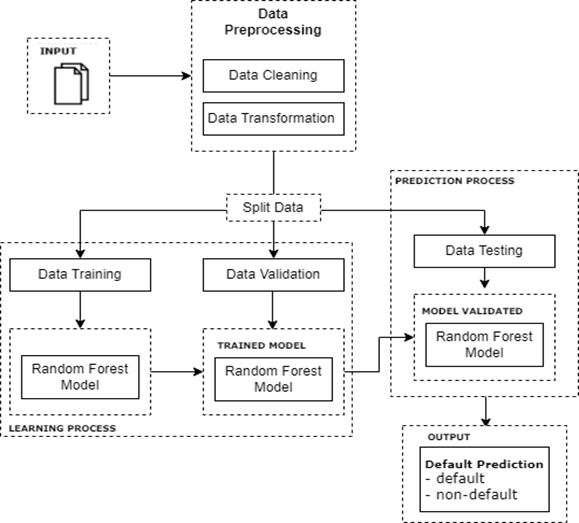

# Exploratory Data Analysis (EDA)

In [1]:
# Mengimport semua librari python yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Menginput/mengambil data dari google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Memasukkan API dimana dataset tersebut berada dan membacanya dengan perintah pd.read_csv
data=pd.read_csv(r"/content/drive/MyDrive/SKRIPSI/new_dataset.csv")

In [4]:
# Membuat salinan dataset agar data primer tetap pada keasliannya dan tidak berubah (Backup and Recovery Data)
df = data.copy()

In [5]:
# menampilkan isi dataset cukup dengan memanggil nama datasetnya saja
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
4,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,172107,1,Cash loans,F,N,N,0,225000.0,508495.5,26091.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
9996,172112,1,Cash loans,F,N,Y,0,112500.0,540000.0,39424.5,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,0.0
9997,172118,1,Cash loans,M,N,Y,0,135000.0,585000.0,29997.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9998,172135,1,Cash loans,M,Y,N,1,405000.0,640080.0,29970.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


*Bisa dilihat banyak data sebanyak 10 ribu baris dan 122 kolom.*

## `Mencari tahu lebih detail nya dari data seperti info nama kolom, tipe data setiap kolomnya, value datanya dan persentase setiap value didalamnya `

---



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 9.3+ MB


In [7]:
for col in df.select_dtypes(include='object').columns.tolist():
    print(df[col].value_counts(normalize=True)*100)
    print('\n')

Cash loans         91.88
Revolving loans     8.12
Name: NAME_CONTRACT_TYPE, dtype: float64


F    61.71
M    38.29
Name: CODE_GENDER, dtype: float64


N    67.58
Y    32.42
Name: FLAG_OWN_CAR, dtype: float64


Y    69.17
N    30.83
Name: FLAG_OWN_REALTY, dtype: float64


Unaccompanied      81.512689
Family             12.859866
Spouse, partner     3.551008
Children            1.073327
Other_B             0.662052
Other_A             0.260809
Group of people     0.080249
Name: NAME_TYPE_SUITE, dtype: float64


Working                 56.09
Commercial associate    22.52
Pensioner               15.53
State servant            5.82
Unemployed               0.04
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special    75.00
Higher education                 20.28
Incomplete higher                 3.21
Lower secondary                   1.43
Academic degree                   0.08
Name: NAME_EDUCATION_TYPE, dtype: float64


Married                 61.81
Single / not married    1

## `Pelabelan Target`

---



Target yang menjadi outputnya adalah nasabah 'default' dan 'non-default'. Dalam data label target masih dalam nilai 0 dan 1. Maka kita lakukan decode untuk mengubah numerik menjadi kategorikal. Nilai 0 sebagai nasabah non-default dan nilai 1 sebagai nasabah default.

In [8]:
decode_map = {0: "Non Default", 1: "Default"}
def decode_sentiment(label):
    return decode_map[int(label)]

df['TARGET'] = df['TARGET'].apply(lambda x: decode_sentiment(x))

Untuk menghitung jumlah data target baik default maupun non-default dan memvisualkan dengan style background dradient cmap='Blues'

In [9]:
target = (df[['TARGET']]
                .groupby("TARGET")
                .agg(COUNT=("TARGET","count"))
                .sort_values(by=["COUNT"],ascending=False)
                .reset_index()
                )

target.style.background_gradient(cmap='Blues')

,TARGET,COUNT
0,Default,5000
1,Non Default,5000


In [10]:
df.TARGET.value_counts()

Non Default    5000
Default        5000
Name: TARGET, dtype: int64

Memvisualisasikan jumlah Nasabah dengan Kemampuan pengembalian pinjamannya (default dan non-default) dengan diagram pie

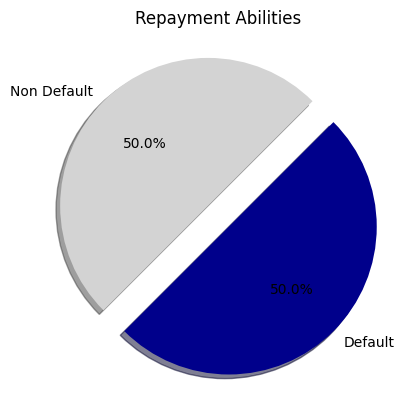

In [11]:
label = ('Non Default', 'Default')
color = ('lightgrey','darkblue')
explode = (0.1, 0.1)

plt.title('Repayment Abilities')
plt.pie(
    df.TARGET.value_counts(),
    labels=label,
    autopct='%1.1f%%',
    colors=color,
    explode=explode,
    shadow=True,
    startangle=45
)
plt.show()

*Jumlah Nasabah Berdasarkan Kemampuan Membayarnya*

*0 = lunas/tidak ada masalah pelunasan, 1 = gagal bayar/memiliki kesulitan dalam pembayaran. Data keduanya balance.*

## Bivariate: Categorical Features Vs Target

Contract Type, Gender, Car Ownership Status, and Realty Ownership Status

<Axes: title={'center': '\nClients Repayment Abilities By Realty Ownership Status\n'}, xlabel='FLAG_OWN_REALTY', ylabel='count'>

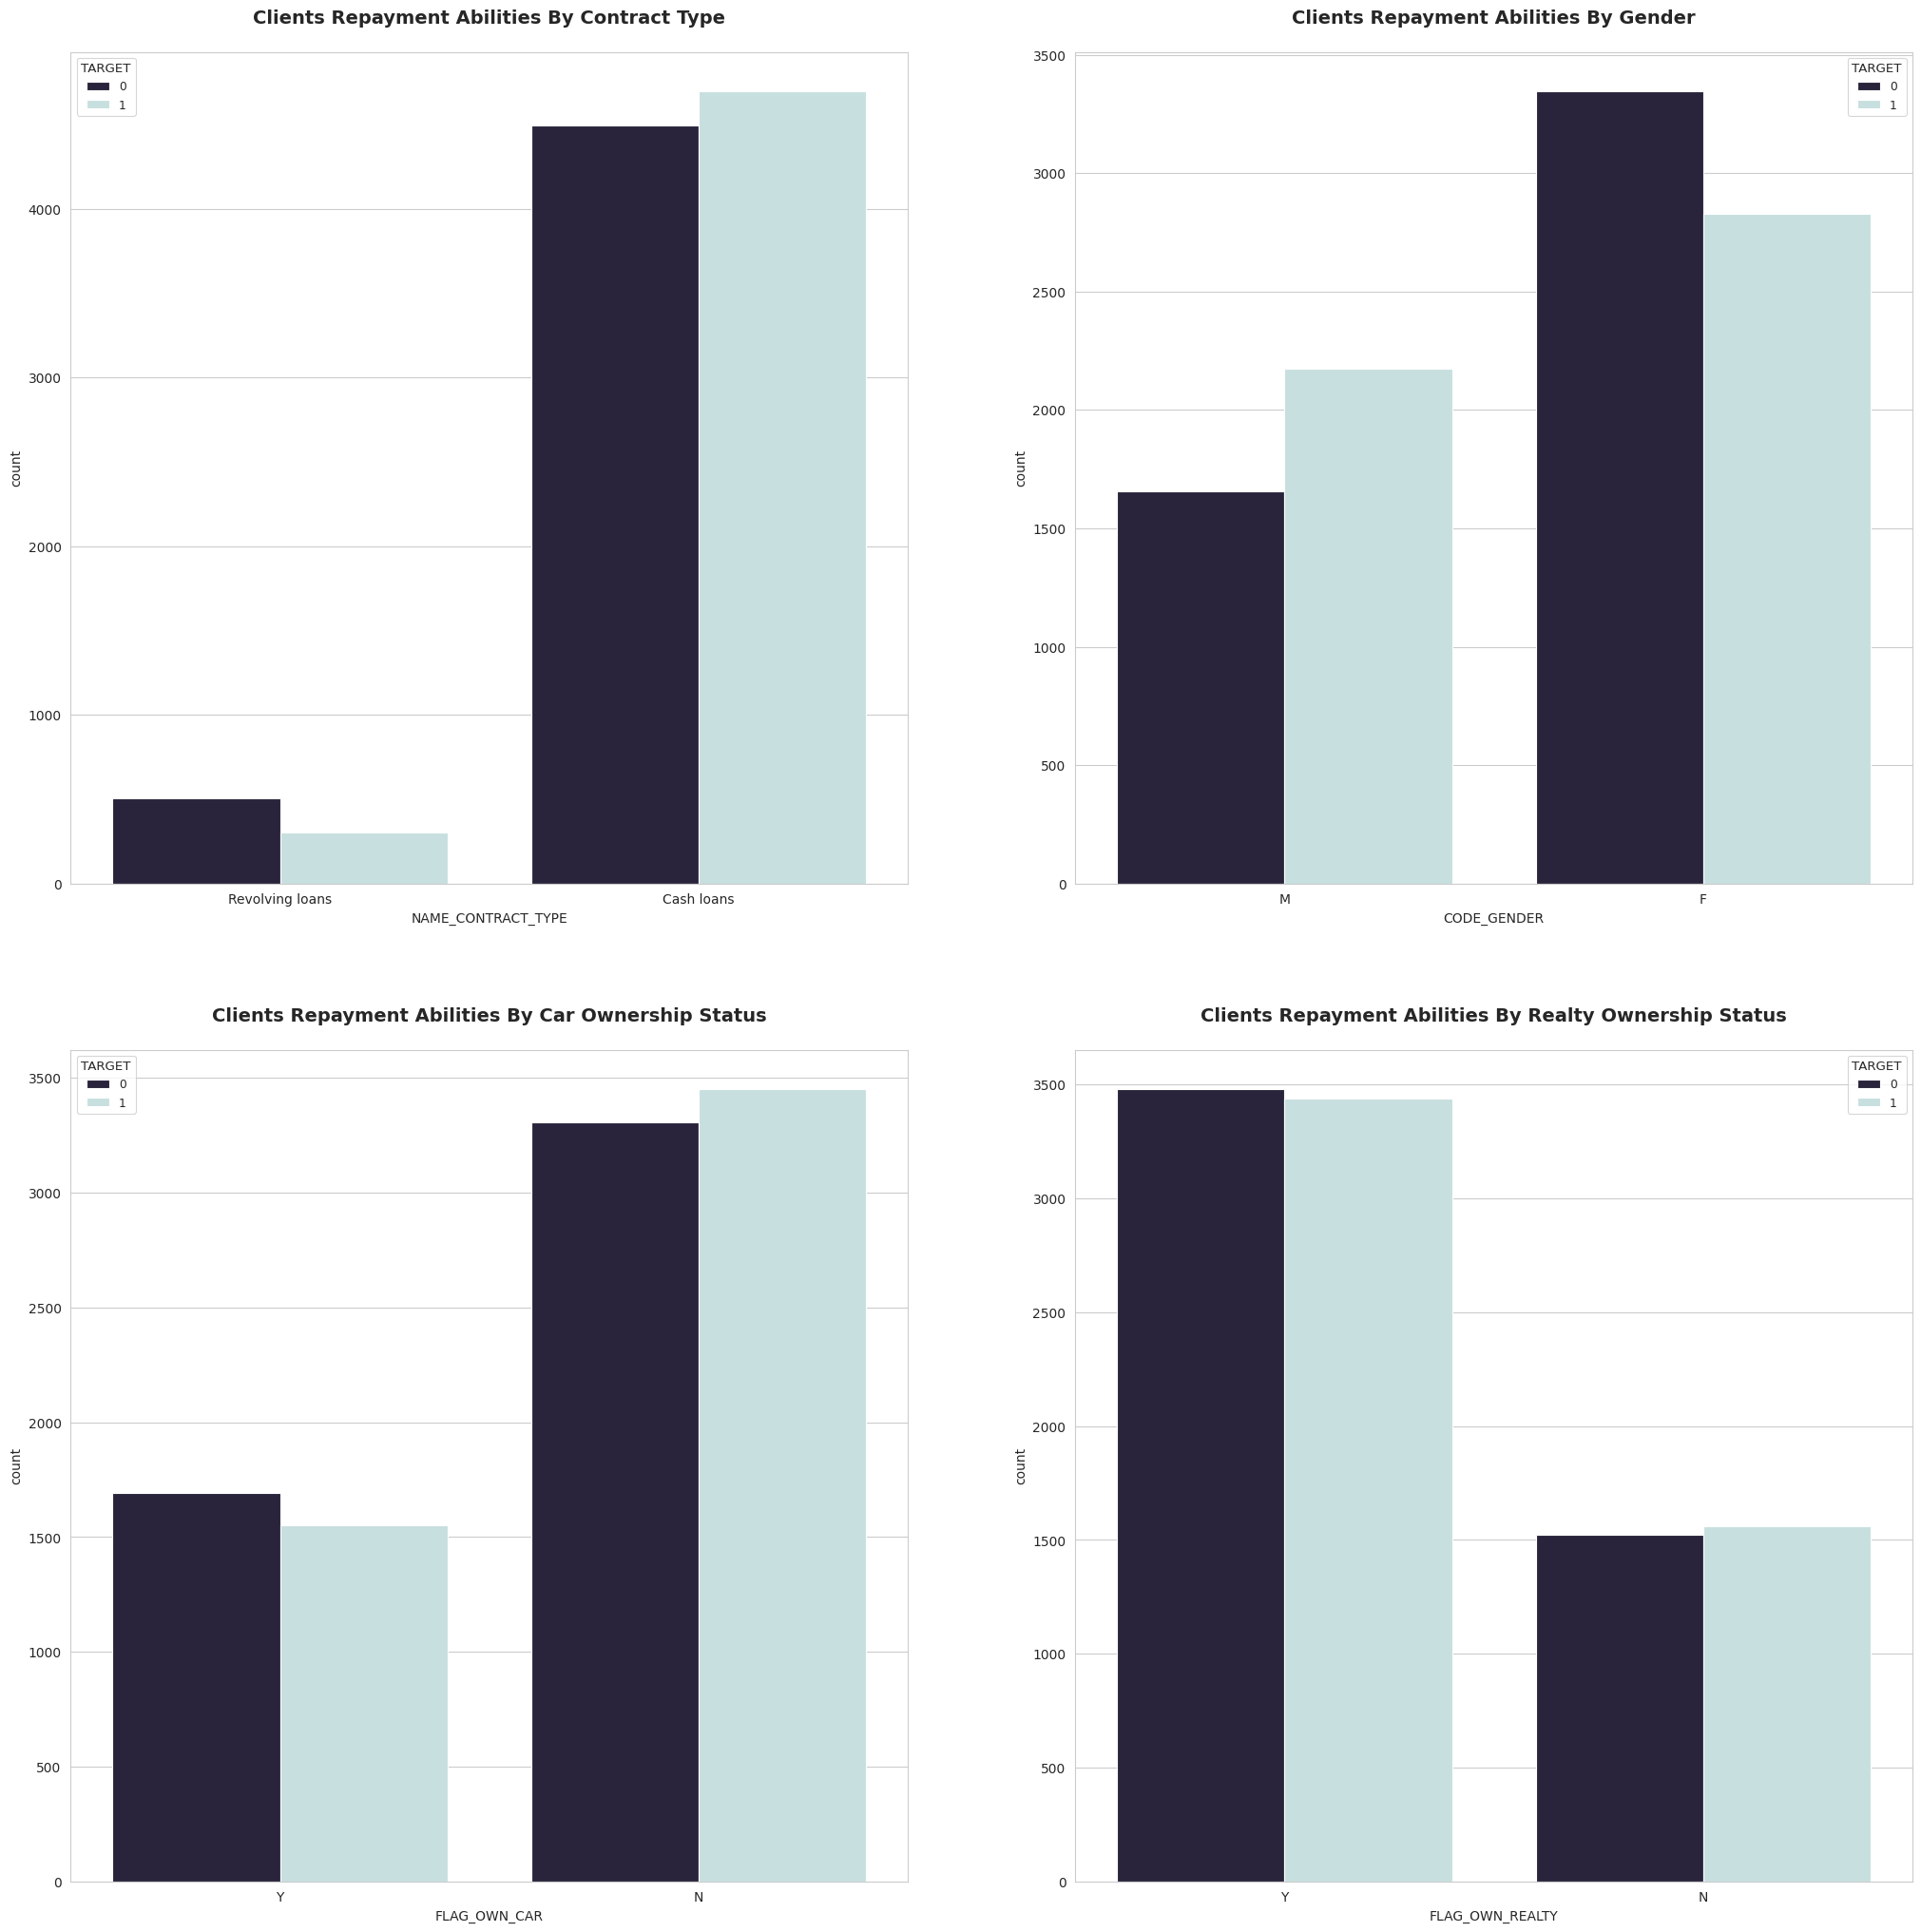

In [12]:
# visualization pt 1
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,25))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Repayment Abilities By Contract Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_CONTRACT_TYPE', data = data, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Gender\n', fontweight='bold', fontsize=14)
sns.countplot(x='CODE_GENDER', data = data, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][1])

ax[1][0].set_title('\nClients Repayment Abilities By Car Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_CAR', data = data, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][0])

ax[1][1].set_title('\nClients Repayment Abilities By Realty Ownership Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='FLAG_OWN_REALTY', data = data, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][1])

In [13]:
ct = data.groupby(by=['NAME_CONTRACT_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Contract Type')
ct.sort_values(by='SK_ID_CURR', ascending=False)
ct.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Contract Type


,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,0,4493
1,Cash loans,1,4695
2,Revolving loans,0,507
3,Revolving loans,1,305


Gender vs Target

In [14]:
data['CODE_GENDER'] = data['CODE_GENDER'].replace(['F','M'],['Female','Male'])

In [15]:
gt = data.groupby(by=['CODE_GENDER','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Gender')
gt.sort_values(by='SK_ID_CURR', ascending=False)
gt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Gender


,CODE_GENDER,TARGET,SK_ID_CURR
0,Female,0,3344
1,Female,1,2827
2,Male,0,1656
3,Male,1,2173


In [16]:
data[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean().sort_values(['TARGET'], ascending=False)

,CODE_GENDER,TARGET
1,Male,0.567511
0,Female,0.458111


*Jumlah nasabah 10000, Wanita sebanyak 6171 dan Pria sebanyak 3829. Dapat dilihat bahwa wanita yang kebanyakan mengajukan pinjaman dalam data. Namun persentase yang lebih besar mengalami masalah membayar pinjaman adalah pria. Persentase pria default dari total nasabah Pria ada sekitar 56%. Persentase wanita default dari total semua nasabah Wanita adalah sekitar 45%. Jadi dari 3829 pria yang mengajukan pinjaman 56% nya itu mengalami default. Dibandingkan wanita yang masih lebih banyak persentasenya yang melunasi pinjaman (non-default).*

Car Ownership Status vs Target

In [17]:
df['FLAG_OWN_CAR'] = df['FLAG_OWN_CAR'].replace(['Y','N'],['Yes','No'])

In [18]:
ot = df.groupby(by=['FLAG_OWN_CAR','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Car Ownership Status')
ot.sort_values(by='SK_ID_CURR', ascending=False)
ot.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Car Ownership Status


,FLAG_OWN_CAR,TARGET,SK_ID_CURR
0,No,Default,3450
1,No,Non Default,3308
2,Yes,Default,1550
3,Yes,Non Default,1692


In [19]:
data[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_CAR,TARGET
0,N,0.510506
1,Y,0.478100


*Jumlah nasabah tidak punya mobil 6758 dan nasabah punya mobil 3242. Berdasarkan data, sebagian besar nasabah tidak memiliki mobil. Kemudian persentase nasabah mengalami default dari total nasabah yang memiliki mobil, ada sekitar 51% nasabah. Beda hal nya dengan nasabah yang tidak memiliki mobil yang memiliki 47% saja yang default dari semua nasabah tidak punya mobil. Jadi bisa dibilang nasabah yang memiliki mobil ada kecenderungan lebih untuk mengalami default.*

In [20]:
df['FLAG_OWN_REALTY'] = df['FLAG_OWN_REALTY'].replace(['Y','N'],['Yes','No'])

Realty Owenership Status vs Target

In [21]:
rt = df.groupby(by=['FLAG_OWN_REALTY','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Realty Ownership Status')
rt.sort_values(by='SK_ID_CURR', ascending=False)
rt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Realty Ownership Status


,FLAG_OWN_REALTY,TARGET,SK_ID_CURR
0,No,Default,1562
1,No,Non Default,1521
2,Yes,Default,3438
3,Yes,Non Default,3479


In [22]:
data[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_REALTY,TARGET
0,N,0.506649
1,Y,0.497036


*Nasabah yang memiliki rumah/apartemen ada sebanyak 6917 nasabah. Nasabah yang tidak memiliki rumah ada sebanyak 3083 nasabah. Dari keseluruhan nasabah yang memiliki rumah, sebanyak 3438 nasabah mengalami default dan dari keseluruhan nasabah yang tidak memiliki rumah, sebanyak 1562 nasabah mengalami default. Maka nasabah yang memiliki rumah lebih cenderung default.*

Suite Type, Income Type, Education Type, and Family Status

<Axes: title={'center': '\nClients Repayment Abilities By Family Status\n'}, xlabel='NAME_FAMILY_STATUS', ylabel='count'>

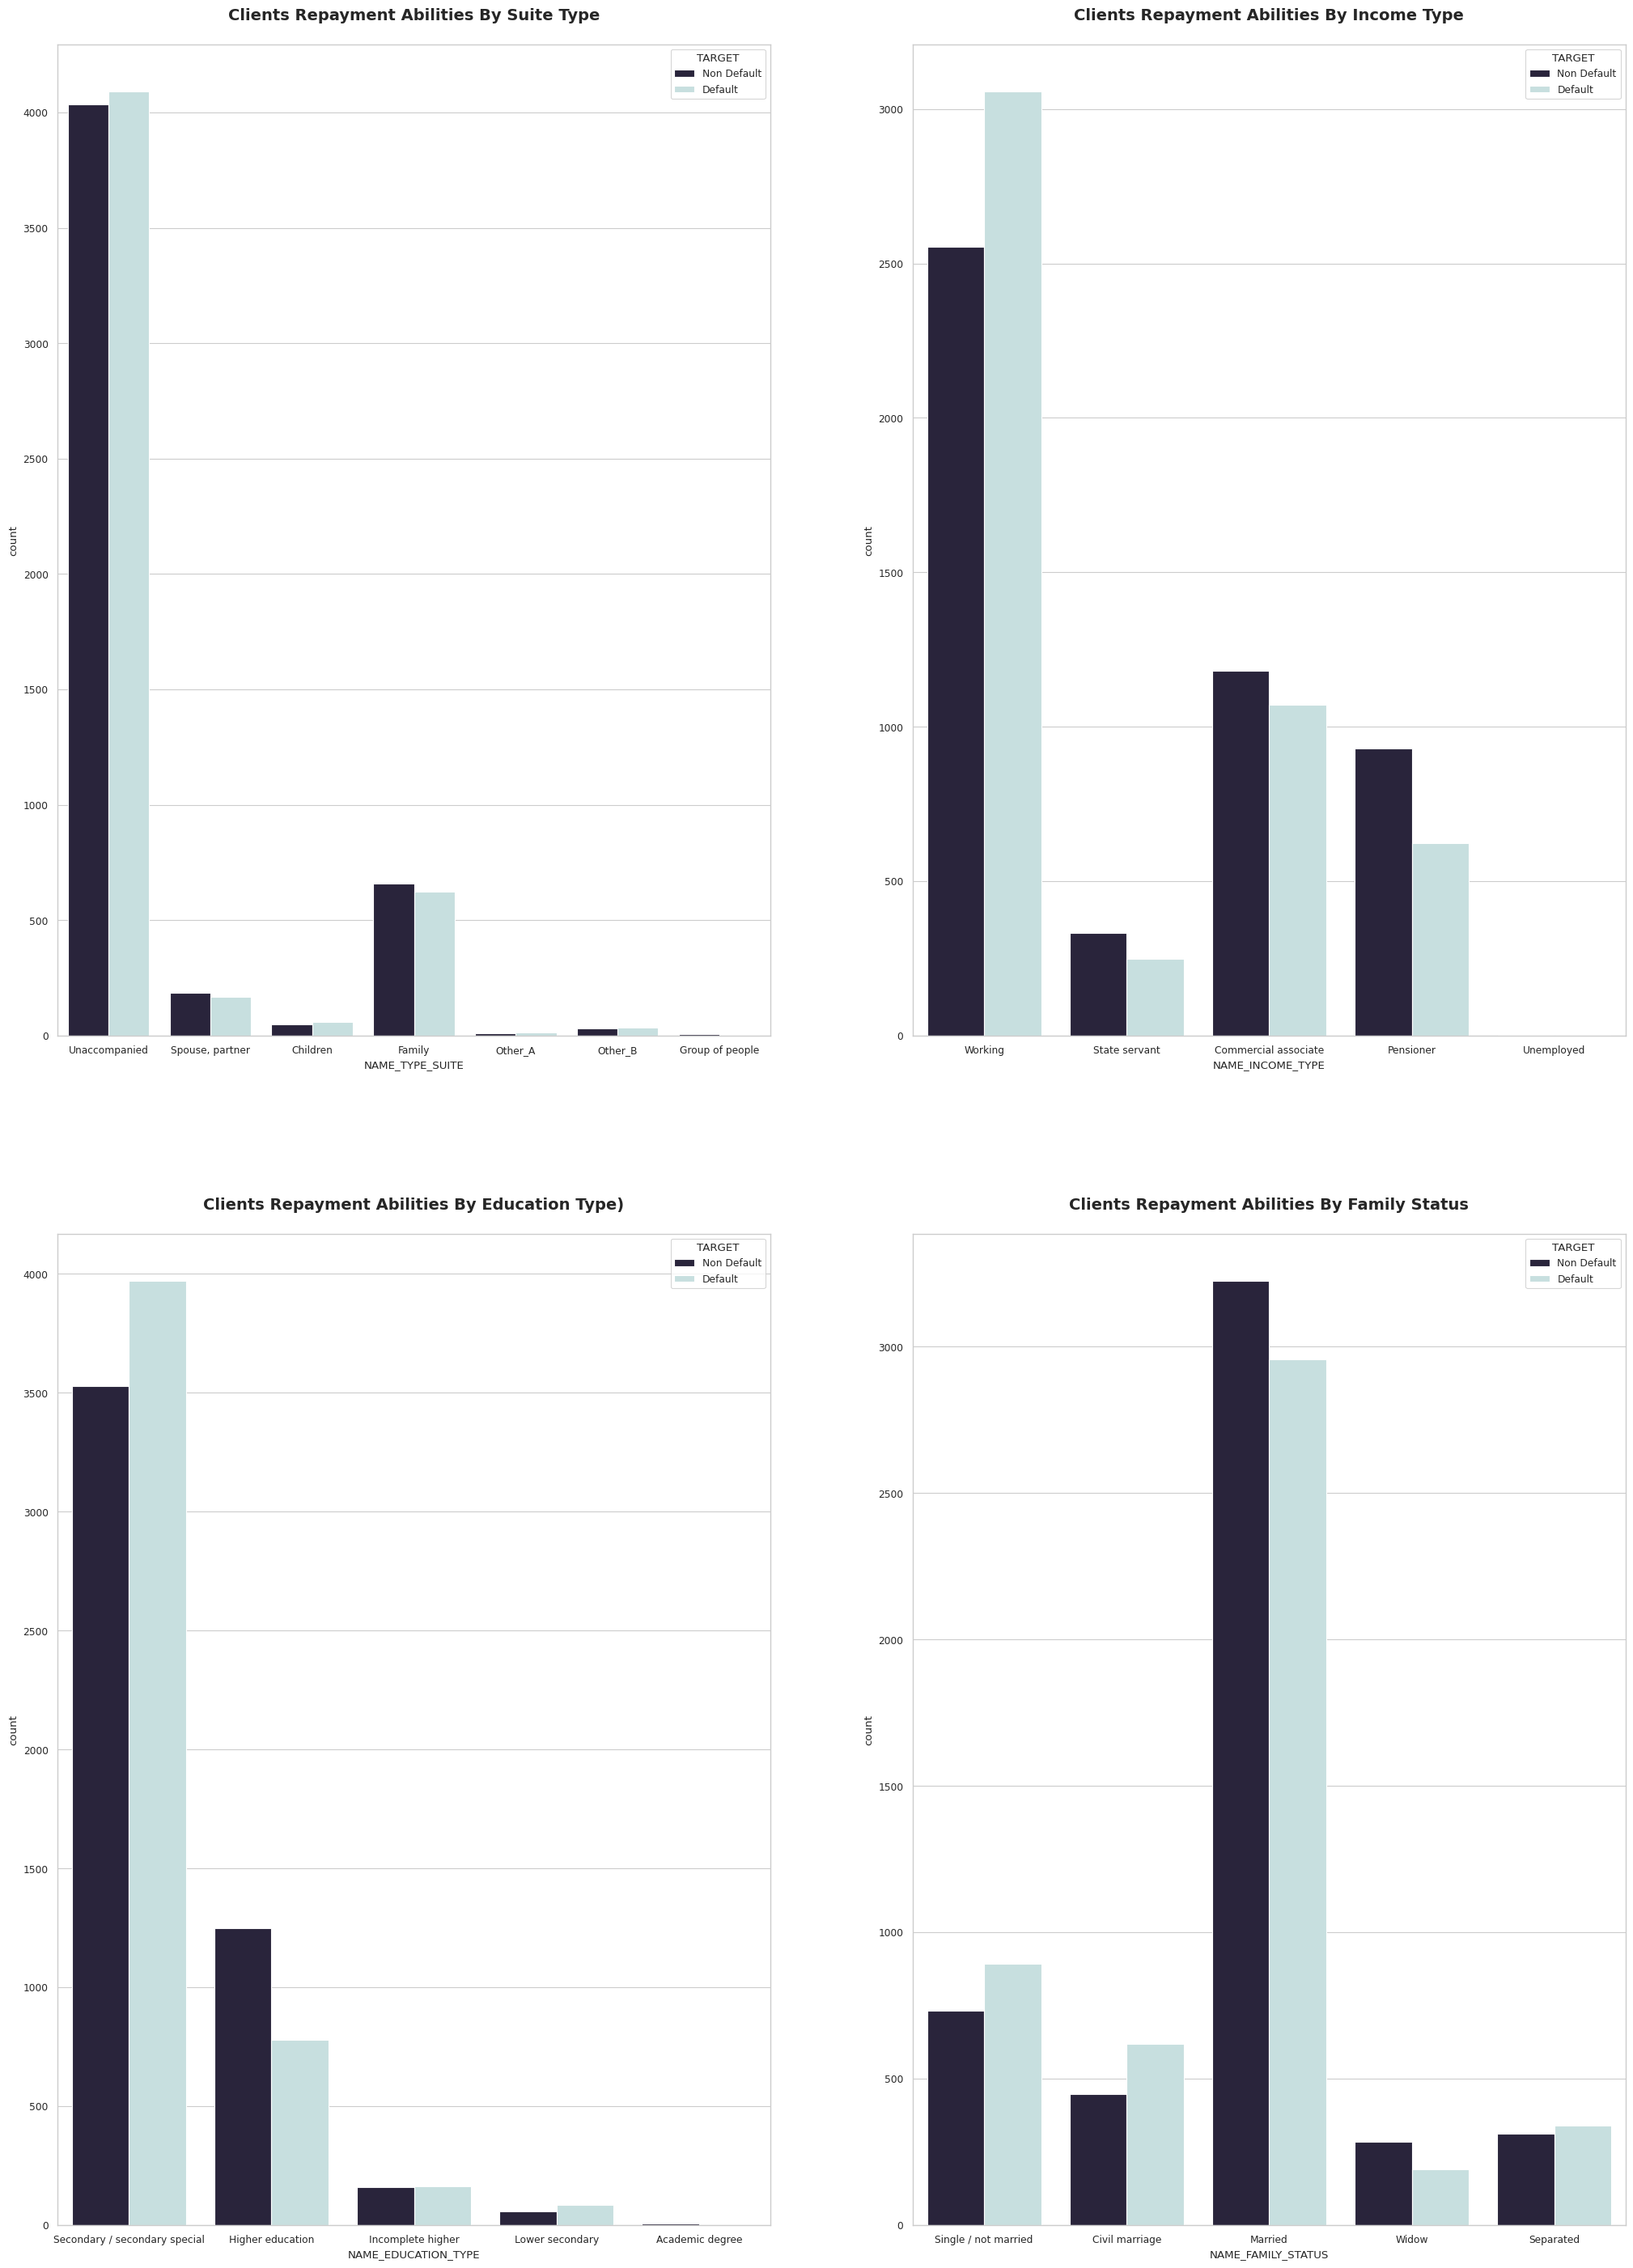

In [23]:
# visualization pt. 2
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,35))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Clients Repayment Abilities By Suite Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_TYPE_SUITE', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][0])

ax[0][1].set_title('Clients Repayment Abilities By Income Type\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_INCOME_TYPE', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[0][1])

ax[1][0].set_title('\nClients Repayment Abilities By Education Type)\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_EDUCATION_TYPE', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][0])

ax[1][1].set_title('\nClients Repayment Abilities By Family Status\n', fontweight='bold', fontsize=14)
sns.countplot(x='NAME_FAMILY_STATUS', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r', ax=ax[1][1])

Suite Type Vs Target

In [24]:
st = df.groupby(by=['NAME_TYPE_SUITE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Suite Type')
st.sort_values(by='SK_ID_CURR', ascending=False)
st.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Suite Type


,NAME_TYPE_SUITE,TARGET,SK_ID_CURR
0,Children,Default,59
1,Children,Non Default,48
2,Family,Default,622
3,Family,Non Default,660
4,Group of people,Default,2
5,Group of people,Non Default,6
6,Other_A,Default,15
7,Other_A,Non Default,11
8,Other_B,Default,35
9,Other_B,Non Default,31


In [25]:
data[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_TYPE_SUITE,TARGET
3,Other_A,0.576923
0,Children,0.551402
4,Other_B,0.530303
6,Unaccompanied,0.503323
1,Family,0.485179
5,"Spouse, partner",0.471751
2,Group of people,0.250000


*Klien yang ditemani oleh other_b saat mengajukan pinjaman memiliki persentase yang lebih tinggi untuk mengalami kesulitan dalam melunasi pinjaman (sekitar 10%).*

Name Income Type VS Target

In [26]:
rt = df.groupby(by=['NAME_INCOME_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Income Type')
rt.sort_values(by='SK_ID_CURR', ascending=False)
rt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Income Type


,NAME_INCOME_TYPE,TARGET,SK_ID_CURR
0,Commercial associate,Default,1070
1,Commercial associate,Non Default,1182
2,Pensioner,Default,623
3,Pensioner,Non Default,930
4,State servant,Default,249
5,State servant,Non Default,333
6,Unemployed,Default,2
7,Unemployed,Non Default,2
8,Working,Default,3056
9,Working,Non Default,2553


In [27]:
data[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
4,Working,0.544839
3,Unemployed,0.500000
0,Commercial associate,0.475133
2,State servant,0.427835
1,Pensioner,0.401159


*Bisa dilihat bahwa nasabah yang paling banyak mengajukan pinjaman adalah tipe pendapatan Working, yaitu sekitar 5609 pengajuan pinjaman. Nasabah dengan tipe pendapatan Working (sekitar 54% dari keseluruhan nasabah yang tipe pendapatannya working) dan Unemployed (50% dari jumlah nasabah yang tipe pendapatannya unemployed) memiliki persentase tinggi untuk gagal bayar (default). Kemudian ada Commercial associate yang memiliki persentase nasabah default sebesar 47% dari total nasabah yang memiliki tipe pendapatan comercial associate.*

Education Type Vs Target

In [28]:
et = df.groupby(by=['NAME_EDUCATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Education Type')
et.sort_values(by='SK_ID_CURR', ascending=False)
et.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Education Type


,NAME_EDUCATION_TYPE,TARGET,SK_ID_CURR
0,Academic degree,Default,1
1,Academic degree,Non Default,7
2,Higher education,Default,780
3,Higher education,Non Default,1248
4,Incomplete higher,Default,163
5,Incomplete higher,Non Default,158
6,Lower secondary,Default,86
7,Lower secondary,Non Default,57
8,Secondary / secondary special,Default,3970
9,Secondary / secondary special,Non Default,3530


In [29]:
data[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.601399
4,Secondary / secondary special,0.529333
2,Incomplete higher,0.507788
1,Higher education,0.384615
0,Academic degree,0.125000


Sejumlah besar aplikasi (218 ribu) diajukan oleh nasabah yang memiliki pendidikan menengah, diikuti oleh nasabah dengan pendidikan tinggi dengan 75 ribu aplikasi.

Sementara itu, dapat dilihat bahwa nasabah dengan jenis pendidikan menengah ke bawah memiliki persentase tertinggi (sekitar 10%) dari TARGET = 1, yaitu mengalami masalah dalam membayar pinjaman.

Family Status Vs Target

In [30]:
ft = df.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Family Status')
ft.sort_values(by='SK_ID_CURR', ascending=False)
ft.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Family Status


,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
0,Civil marriage,Default,619
1,Civil marriage,Non Default,448
2,Married,Default,2957
3,Married,Non Default,3224
4,Separated,Default,341
5,Separated,Non Default,312
6,Single / not married,Default,892
7,Single / not married,Non Default,731
8,Widow,Default,191
9,Widow,Non Default,285


In [31]:
data[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.580131
3,Single / not married,0.549600
2,Separated,0.522205
1,Married,0.478402
4,Widow,0.401261


*Dapat diketahui dari Gambar 3.9 bahwa nasabah yang sudah menikah lebih banyak mengajukan pinjaman yaitu sekitar 6181 pengajuan pinjaman. Nasabah dengan status keluarga sudah menikah dan lajang memiliki persentase tertinggi (sekitar 58%) dari nasabah yang mengalami masalah dalam pengembalian pinjaman.*

Count Children Vs Target

Text(0.5, 0, '\nCNT_CHILDREN')

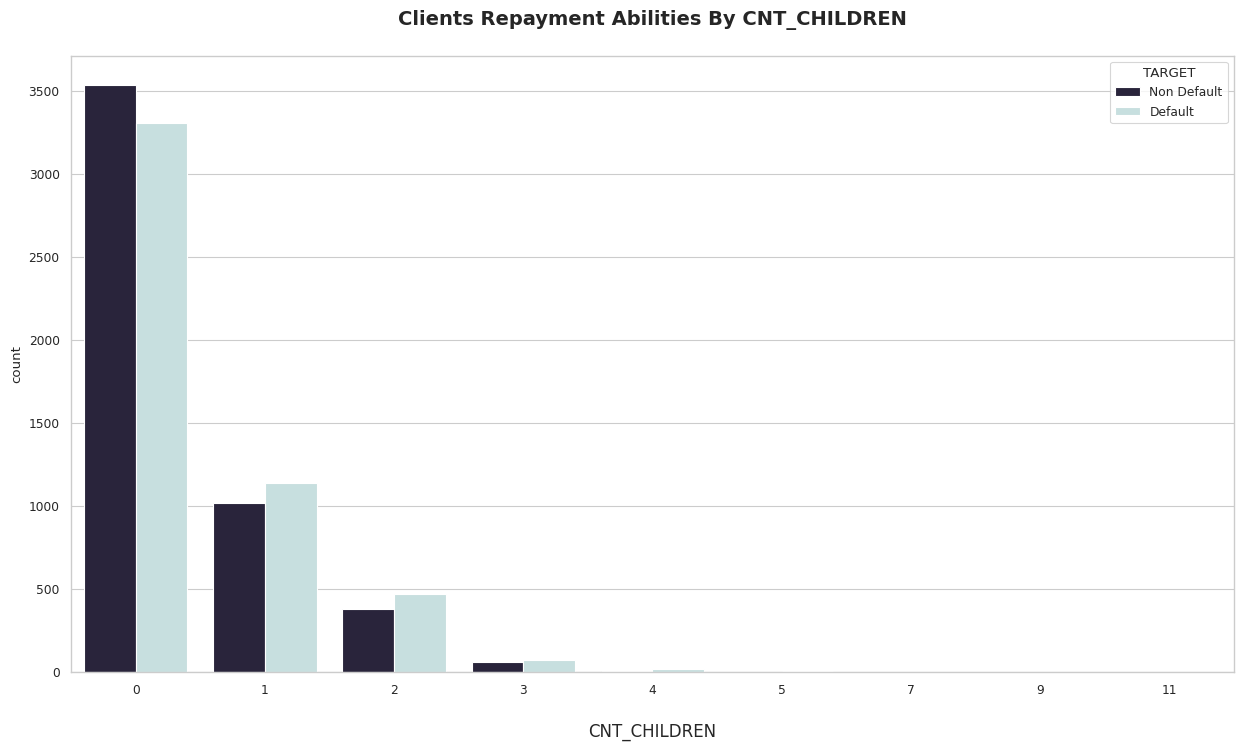

In [32]:
# visualization
plt.figure(figsize=(15,8))
fig = sns.countplot(x='CNT_CHILDREN', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r')
plt.title('Clients Repayment Abilities By CNT_CHILDREN\n', fontweight='bold', fontsize=14)
plt.xlabel('\nCNT_CHILDREN', fontsize=12)

*Dapat dilihat bahwa lebih banyak nasabah yang tidak memiliki anak (0) yang berhasil untuk melunasi pinjaman dibandingkan nasabah yang memiliki anak.*

Count Family Member Vs Target

Text(0.5, 0, '\nCNT_FAM_MEMBERS')

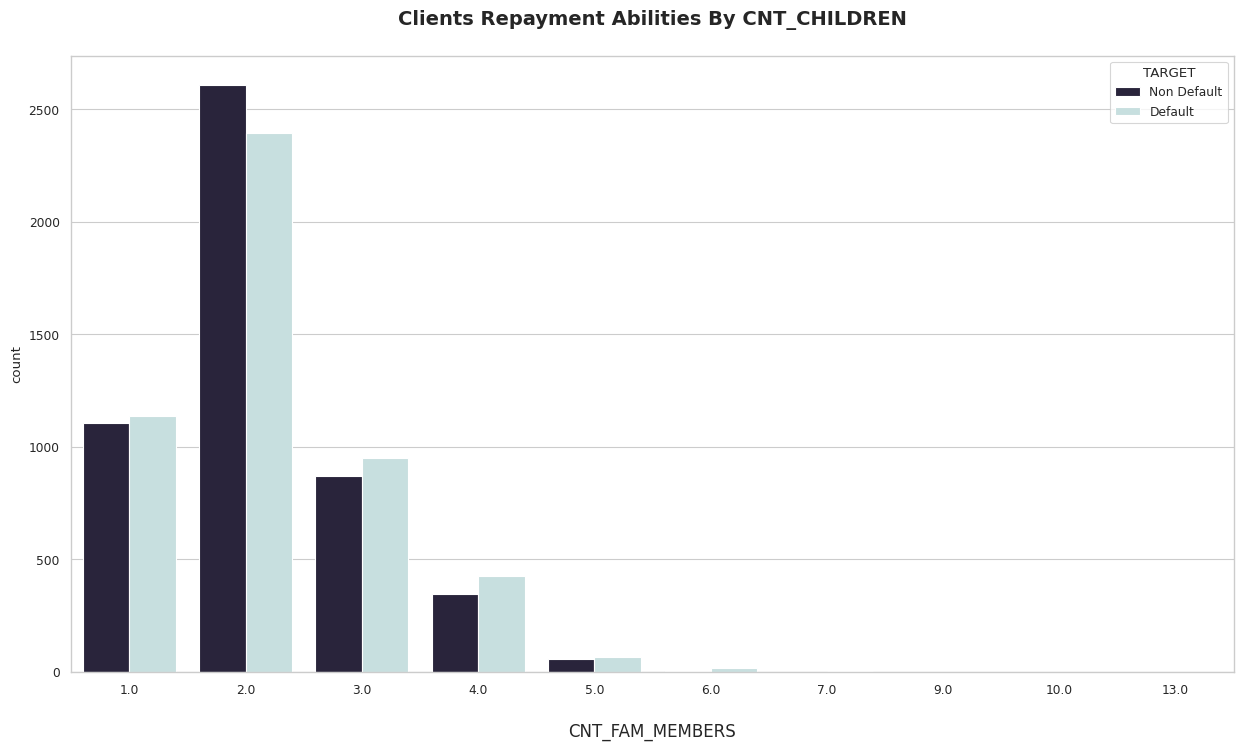

In [33]:
# visualization
plt.figure(figsize=(15,8))
fig = sns.countplot(x='CNT_FAM_MEMBERS', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r')
plt.title('Clients Repayment Abilities By CNT_CHILDREN\n', fontweight='bold', fontsize=14)
plt.xlabel('\nCNT_FAM_MEMBERS', fontsize=12)

Housing Type, Occupation Type, Process Day, and Organization Type

Housing Type vs Target

In [34]:
ht = df.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Housing Type')
ht.sort_values(by='SK_ID_CURR', ascending=False)
ht.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Housing Type


,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
0,Co-op apartment,Default,17
1,Co-op apartment,Non Default,26
2,House / apartment,Default,4316
3,House / apartment,Non Default,4436
4,Municipal apartment,Default,179
5,Municipal apartment,Non Default,191
6,Office apartment,Default,35
7,Office apartment,Non Default,38
8,Rented apartment,Default,114
9,Rented apartment,Non Default,85


In [35]:
data[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_HOUSING_TYPE,TARGET
5,With parents,0.602131
4,Rented apartment,0.572864
1,House / apartment,0.493144
2,Municipal apartment,0.483784
3,Office apartment,0.479452
0,Co-op apartment,0.395349


Dapat dilihat bahwa nasabah dengan tipe rumah kontrakan memiliki persentase tertinggi (sekitar 12%) dalam hal kesulitan melunasi pinjaman.

Text(0.5, 0, '\nHousing Type')

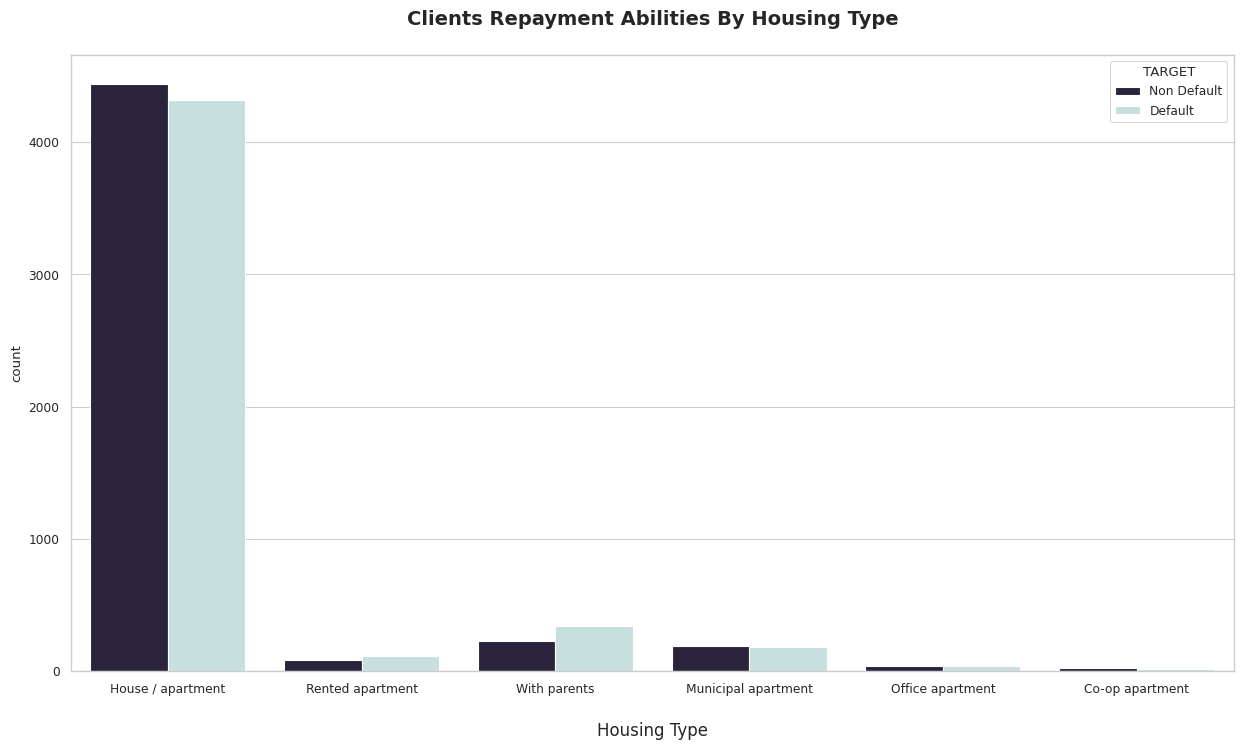

In [36]:
# visualization
plt.figure(figsize=(15,8))
fig = sns.countplot(x='NAME_HOUSING_TYPE', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r')
plt.title('Clients Repayment Abilities By Housing Type\n', fontweight='bold', fontsize=14)
plt.xlabel('\nHousing Type', fontsize=12)

Klien yang tinggal di rumah/apartemen memiliki jumlah pengajuan pinjaman tertinggi yaitu sebesar 272 ribu.

Occupation Type Vs Target

In [37]:
ot = df.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Occupation Type')
ot.sort_values(by='SK_ID_CURR', ascending=False)
ot.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Occupation Type


,OCCUPATION_TYPE,TARGET,SK_ID_CURR
0,Accountants,Default,102
1,Accountants,Non Default,175
2,Cleaning staff,Default,85
3,Cleaning staff,Non Default,66
4,Cooking staff,Default,135
5,Cooking staff,Non Default,95
6,Core staff,Default,340
7,Core staff,Non Default,473
8,Drivers,Default,420
9,Drivers,Non Default,304


In [38]:
data[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.625000
17,Waiters/barmen staff,0.625000
2,Cooking staff,0.586957
8,Laborers,0.580564
4,Drivers,0.580110
16,Security staff,0.573171
1,Cleaning staff,0.562914
14,Sales staff,0.531223
13,Realty agents,0.481481
12,Private service staff,0.477273


Sejumlah besar aplikasi (55 ribu) diajukan oleh nasabah yang bekerja sebagai Buruh.

Terlihat bahwa nasabah dengan jenis pekerjaan Buruh Berketerampilan Rendah memiliki persentase tertinggi (sekitar 17%) dari TARGET = 1, yaitu mengalami masalah dalam membayar pinjaman.

Process Day Vs Target

In [39]:
pt = df.groupby(by=['WEEKDAY_APPR_PROCESS_START','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Process Day')
pt.sort_values(by='SK_ID_CURR', ascending=False)
pt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Process Day


,WEEKDAY_APPR_PROCESS_START,TARGET,SK_ID_CURR
0,FRIDAY,Default,823
1,FRIDAY,Non Default,821
2,MONDAY,Default,821
3,MONDAY,Non Default,813
4,SATURDAY,Default,519
5,SATURDAY,Non Default,568
6,SUNDAY,Default,267
7,SUNDAY,Non Default,275
8,THURSDAY,Default,850
9,THURSDAY,Non Default,823


In [40]:
data[['WEEKDAY_APPR_PROCESS_START','TARGET']].groupby(['WEEKDAY_APPR_PROCESS_START'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,WEEKDAY_APPR_PROCESS_START,TARGET
4,THURSDAY,0.508069
6,WEDNESDAY,0.503597
1,MONDAY,0.502448
5,TUESDAY,0.502283
0,FRIDAY,0.500608
3,SUNDAY,0.492620
2,SATURDAY,0.477461


Text(0.5, 0, '\nProcess Day')

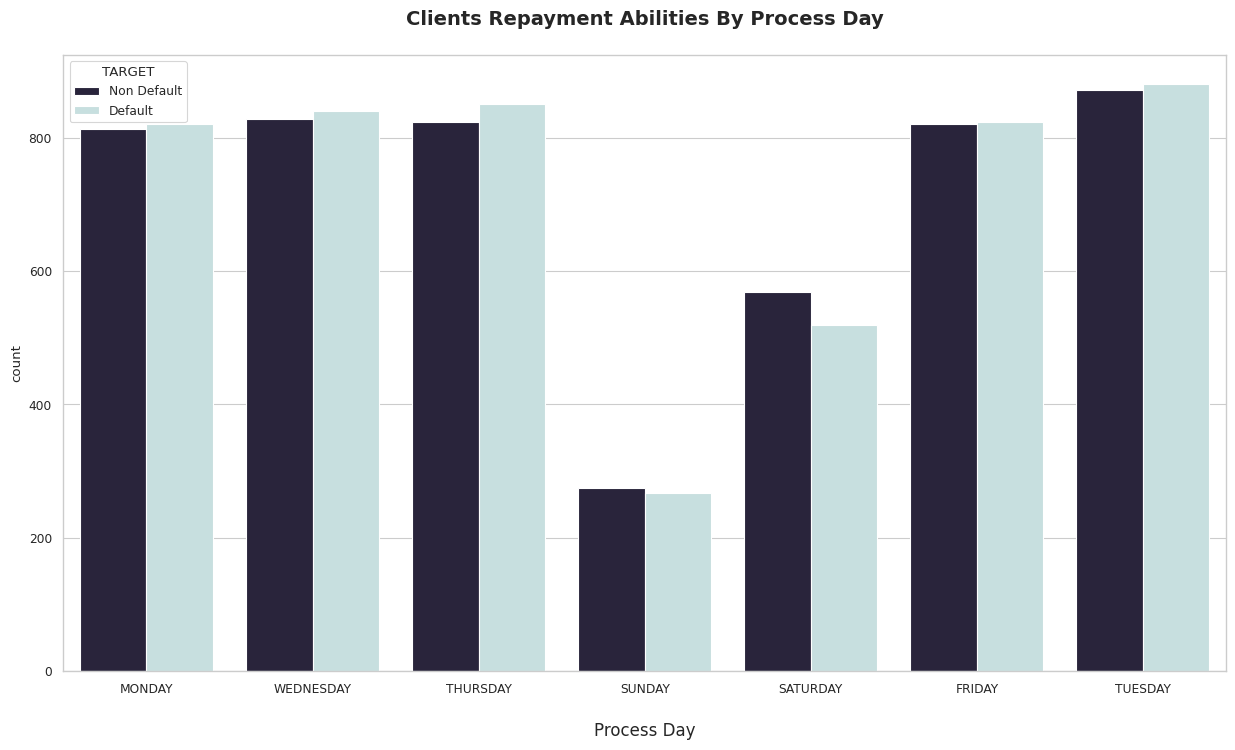

In [41]:
# visualization
plt.figure(figsize=(15,8))
fig = sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data = df, hue = 'TARGET', palette = 'ch:start=0.2,rot=-.3_r')
plt.title('Clients Repayment Abilities By Process Day\n', fontweight='bold', fontsize=14)
plt.xlabel('\nProcess Day', fontsize=12)

Dapat dilihat bahwa setiap hari pemrosesan aplikasi memiliki persentase yang hampir sama (sekitar 7% - 8%) dalam TARGET = 1, yaitu mengalami masalah dalam pengembalian pinjaman.

Organization Type Vs Target

In [42]:
tt = df.groupby(by=['ORGANIZATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
print('Clients Repayment Abilities By Suite Type')
tt.sort_values(by='SK_ID_CURR', ascending=False)
tt.style.background_gradient(cmap='Blues')

Clients Repayment Abilities By Suite Type


,ORGANIZATION_TYPE,TARGET,SK_ID_CURR
0,Advertising,Default,9
1,Advertising,Non Default,5
2,Agriculture,Default,60
3,Agriculture,Non Default,37
4,Bank,Default,30
5,Bank,Non Default,40
6,Business Entity Type 1,Default,107
7,Business Entity Type 1,Non Default,81
8,Business Entity Type 2,Default,165
9,Business Entity Type 2,Non Default,165


In [43]:
data[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,ORGANIZATION_TYPE,TARGET
21,Industry: type 4,0.741935
45,Trade: type 1,0.666667
40,Security,0.660550
38,Restaurant,0.646154
36,Realtor,0.642857
0,Advertising,0.642857
19,Industry: type 2,0.631579
18,Industry: type 13,0.625000
1,Agriculture,0.618557
14,Industry: type 1,0.605263


Terlihat bahwa nasabah dengan tipe organisasi: tipe 3 memiliki persentase tertinggi (sekitar 15%) dengan TARGET = 1, yaitu mengalami masalah dalam pengembalian pinjaman.

# Bivariate: Numerical Features Vs Target

Amount Credit of the Loan Vs Target

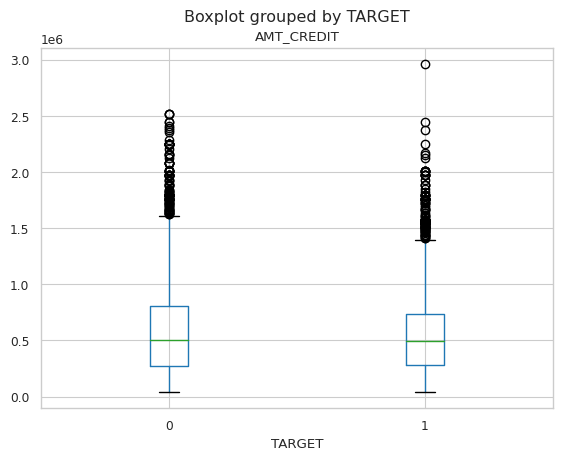

In [44]:
data.boxplot(column = 'AMT_CREDIT', by = 'TARGET');
plt.show()

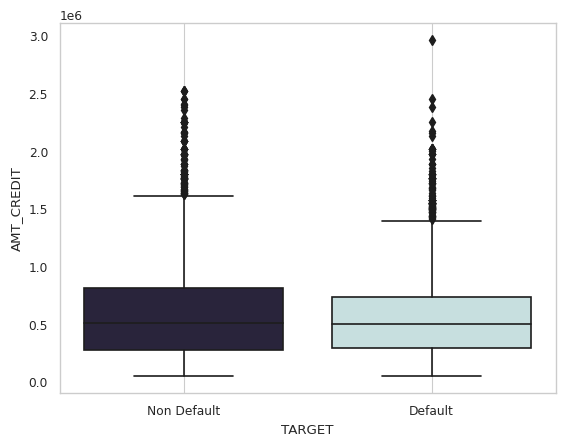

In [45]:
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=df, palette = 'ch:start=0.2,rot=-.3_r')
plt.grid()
plt.show()

Dapat dilihat bahwa nilai median dari jumlah kredit nasabah yang tidak mengalami kesulitan pembayaran sedikit lebih besar dari nilai median nasabah yang mengalami kesulitan pembayaran. Artinya, nasabah dengan jumlah kredit yang lebih tinggi memiliki peluang sedikit lebih tinggi untuk dapat melunasi pinjaman dibandingkan nasabah dengan jumlah kredit yang lebih rendah.

In [46]:
# new.columns.to_list()

In [47]:
# category=['NAME_CONTRACT_TYPE','CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',]

In [48]:
# df.loc[:,category]

Amount Income Vs Target

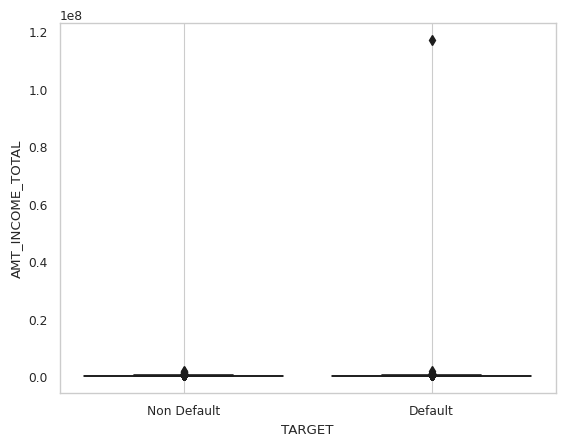

In [49]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df, palette = 'ch:start=0.2,rot=-.3_r')
plt.grid()
plt.show()

Dapat dilihat bahwa baik nasabah yang mengalami kesulitan pembayaran maupun nasabah yang tidak mengalami kesulitan pembayaran, sebagian besar memiliki nilai yang sama. Namun, seiring dengan meningkatnya pendapatan nasabah, probabilitas nasabah yang tidak mengalami kesulitan dalam membayar pinjaman juga meningkat.

Age Vs target

In [50]:
no_age = data[data['TARGET']==0]['DAYS_BIRTH'].values/-365
yes_age = data[data['TARGET']==1]['DAYS_BIRTH'].values/-365

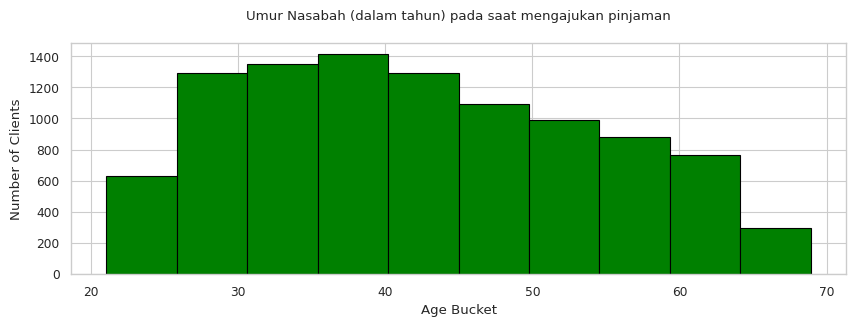

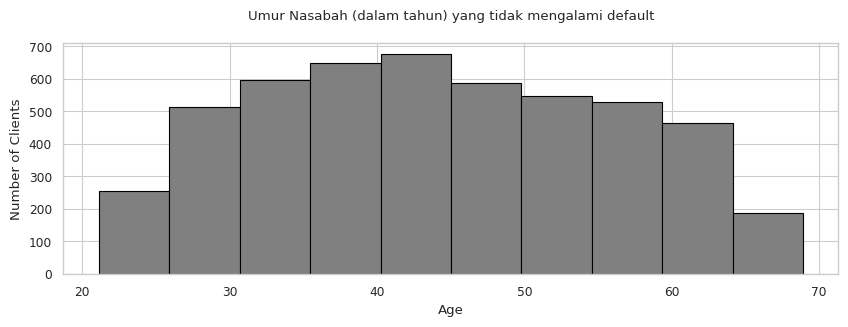

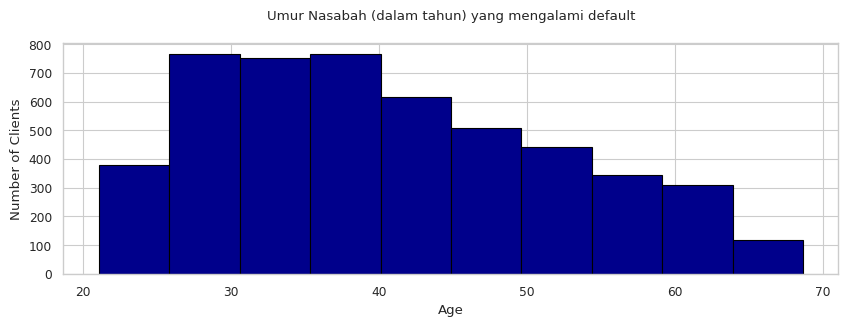

In [51]:
plt.figure(figsize=(10,3))
plt.hist(data['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='green')
plt.title('Umur Nasabah (dalam tahun) pada saat mengajukan pinjaman\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(no_age, bins=10, edgecolor='black', color='gray')
plt.title('Umur Nasabah (dalam tahun) yang tidak mengalami default\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(yes_age, bins=10, edgecolor='black', color='darkblue')
plt.title('Umur Nasabah (dalam tahun) yang mengalami default\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

Sebagian besar nasabah yang mengajukan pinjaman berusia antara 35-40 tahun, diikuti oleh nasabah berusia antara 40-45 tahun. Sementara itu, jumlah pemohon untuk nasabah yang berusia <25 tahun atau usia >65 tahun sangat rendah.

Klien yang tidak mengalami kesulitan pembayaran adalah klien dengan rentang usia 35-45 tahun. Sedangkan klien yang mengalami kesulitan pembayaran adalah klien dengan rentang usia 25-35 tahun.

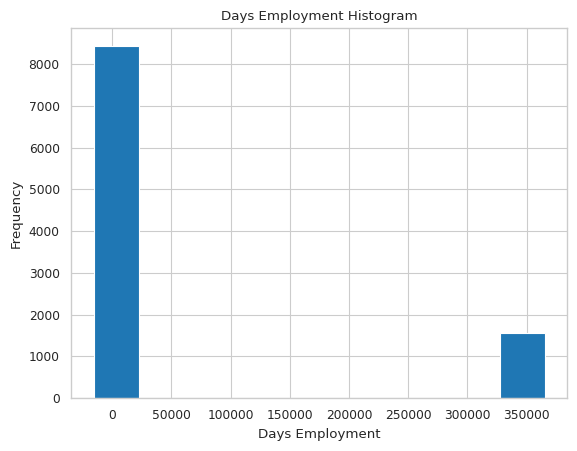

In [52]:
df['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

**Multivariat Visualization**

Grouped by Realty Ownership Status

1. Car Ownership Status, The Number of Children, Target, and House/Flat Ownership Status

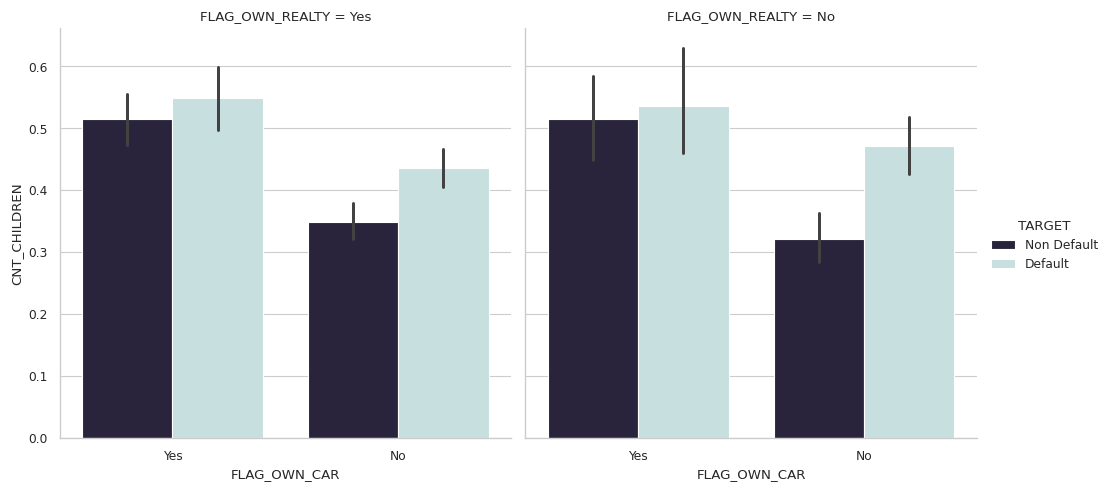

In [53]:
sns.catplot(x = 'FLAG_OWN_CAR',
            y = 'CNT_CHILDREN',
            hue = 'TARGET',
            col = 'FLAG_OWN_REALTY',
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = df)
plt.show()

Nasabah yang memiliki mobil dan rumah/apartemen memiliki masalah dalam membayar pinjaman karena jumlah anak yang lebih banyak dibandingkan dengan nasabah yang tidak memiliki rumah/apartemen.

2. Income Type, Amount of Goods Price, Target, and House/Flat Ownership Status

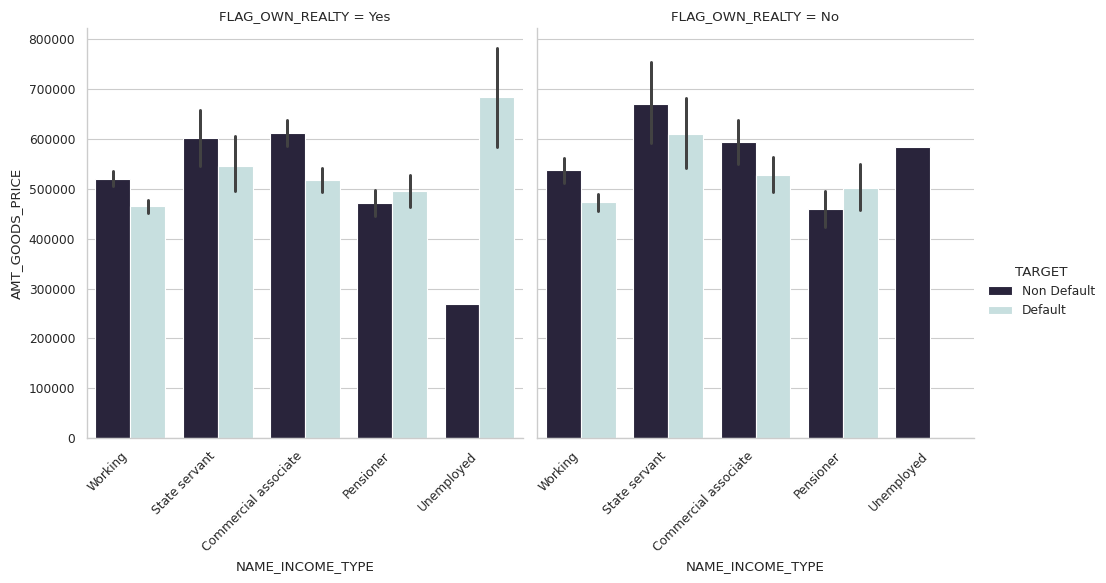

In [54]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_GOODS_PRICE',
            hue = 'TARGET',
            col = 'FLAG_OWN_REALTY',
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Nasabah dengan jenis pendapatan cuti melahirkan pada FLAG_OWN_REALTY = Ya (yaitu memiliki rumah/apartemen) memiliki masalah dalam melunasi pinjaman dibandingkan dengan nasabah dengan jenis pendapatan FLAG_OWN_REALTY = Tidak (yaitu tidak memiliki rumah/apartemen).

3. Family Status, Amount of Income, Target, and House/Flat Ownership Status

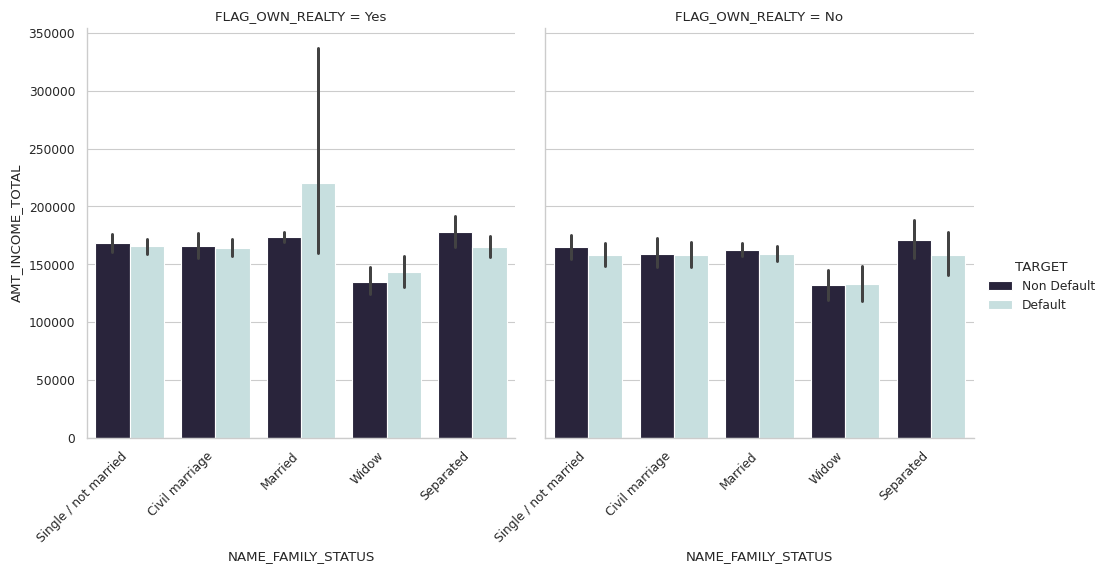

In [55]:
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_INCOME_TOTAL',
            hue = 'TARGET',
            col = 'FLAG_OWN_REALTY',
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Klien yang sudah menikah dan memiliki rumah/flat (FLAG_OWN_REALTY = Ya) memiliki masalah dalam membayar kembali pinjaman dengan pendapatan menengah dibandingkan dengan saat klien tidak memiliki rumah/flat (FLAG_OWN_REALTY = Tidak).

**Grouped by Rating of Region where Client Lives**

1. Housing Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

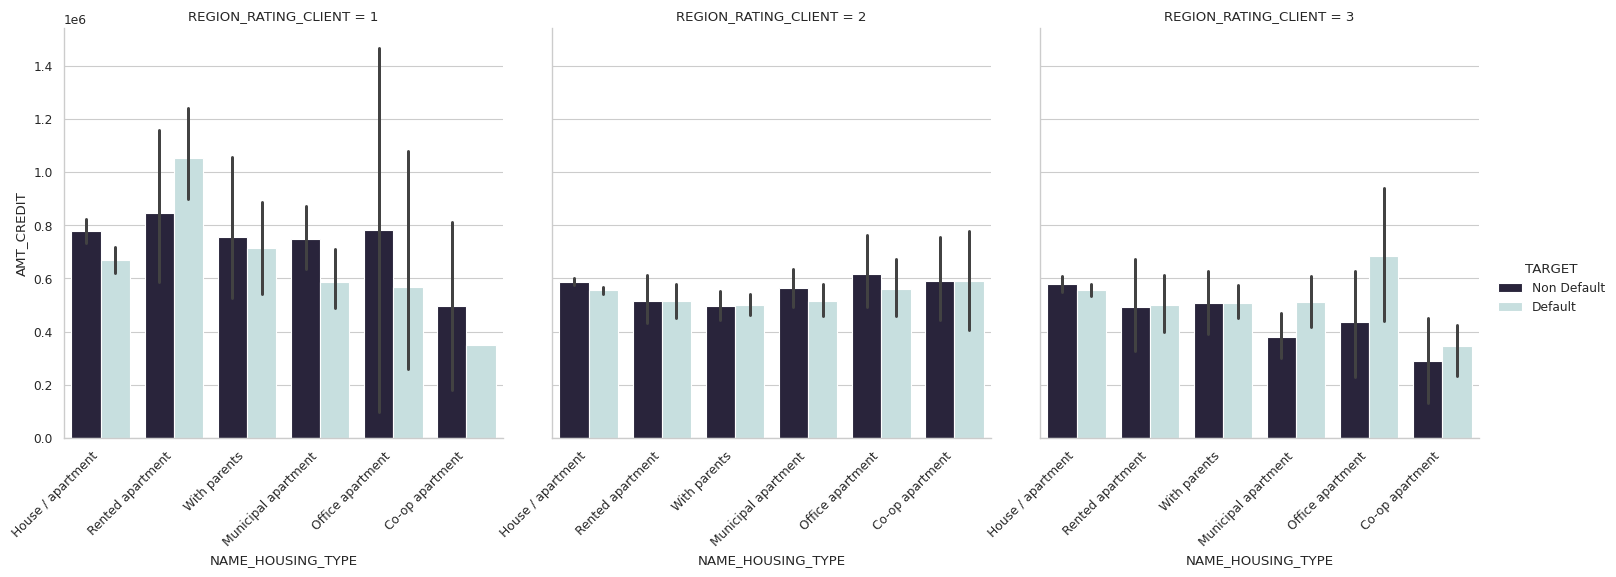

In [56]:
fig = sns.catplot(x = 'NAME_HOUSING_TYPE',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'REGION_RATING_CLIENT',
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Nasabah yang tinggal di apartemen sewaan dan apartemen perkantoran dan wilayah mereka memiliki peringkat 1, memiliki masalah dalam membayar pinjaman dibandingkan dengan nasabah di wilayah dengan peringkat 2 untuk jumlah kredit menengah.

2. Education Type, Amount Credit of Loan, Target, and Rating of Region where Client Lives

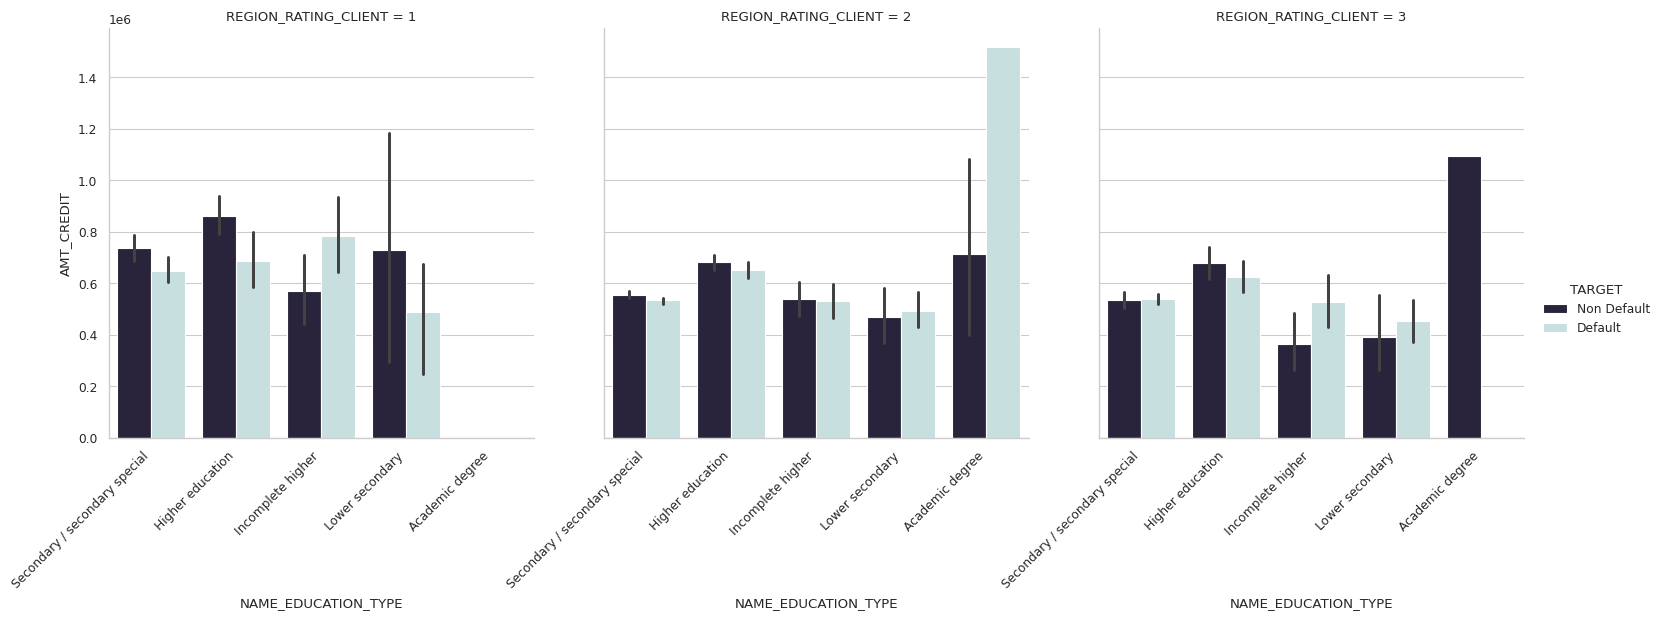

In [57]:
fig = sns.catplot(x = 'NAME_EDUCATION_TYPE',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'REGION_RATING_CLIENT',
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Untuk nasabah yang memiliki gelar akademis dan tinggal di wilayah dengan peringkat 2, memiliki masalah dalam membayar pinjaman untuk jumlah kredit yang lebih tinggi. Dan, nasabah dengan gelar yang sama tetapi tinggal di wilayah dengan peringkat 3 memiliki masalah dalam membayar pinjaman untuk jumlah kredit pinjaman menengah.

3. Family Status, Amount Credit of Loan, Target, and Rating of Region where Client Lives

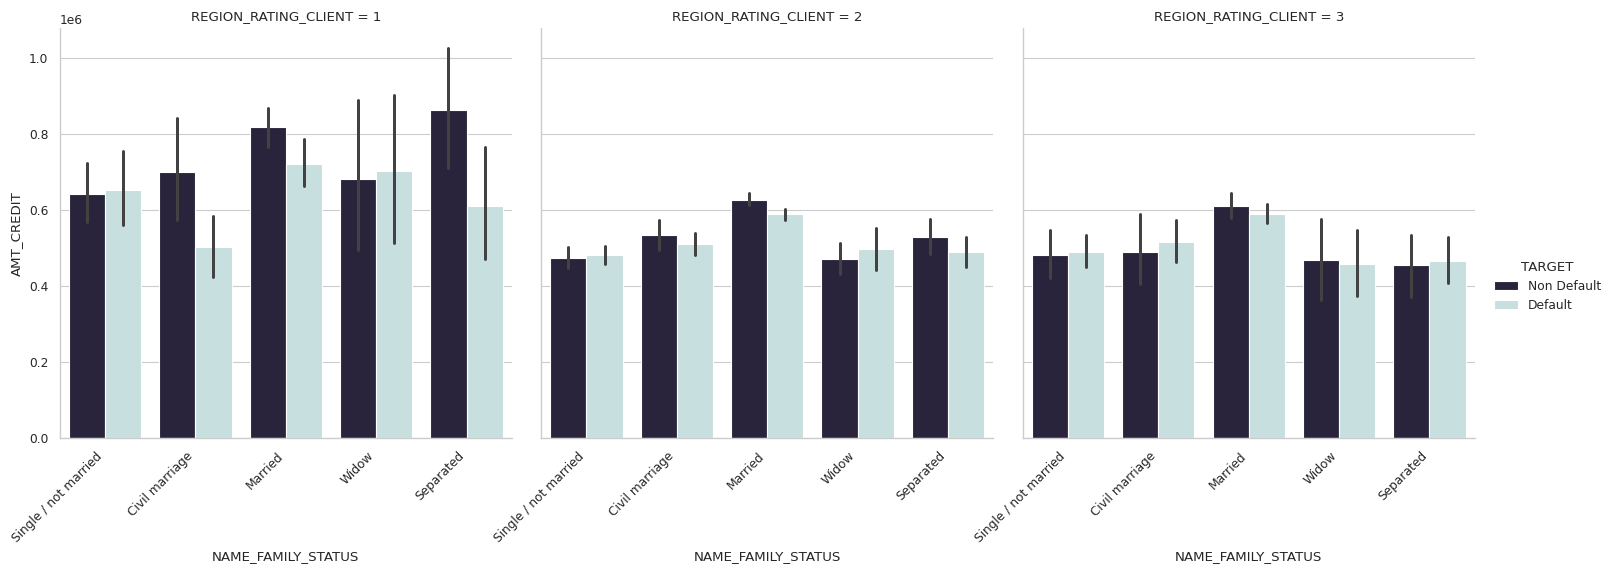

In [58]:
fig = sns.catplot(x = 'NAME_FAMILY_STATUS',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'REGION_RATING_CLIENT',
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = df)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

Nasabah yang memiliki status keluarga sebagai janda, baik yang tinggal di daerah dengan peringkat 1, 2, atau 3, memiliki masalah dalam membayar pinjaman untuk kredit dengan jumlah sedang hingga tinggi.

Nasabah yang memiliki status keluarga sebagai janda/duda, dan tinggal di daerah dengan peringkat 3, memiliki masalah dalam membayar pinjaman untuk jumlah kredit yang sedang dibandingkan dengan nasabah yang tinggal di daerah dengan peringkat 1 atau 2.

# Data Cleaning

In [59]:
#mengecek apakah dataset memiliki data duplikat
data[data.duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [60]:
count = data.isnull().sum().sort_values(ascending=False)
percentage = ((data.isnull().sum()/len(data)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])
print('Count and percentage of missing values for top 20 columns:')
missing_data.head(20)

Count and percentage of missing values for top 20 columns:


,Count,Percentage
COMMONAREA_MEDI,7170,71.70
COMMONAREA_AVG,7170,71.70
COMMONAREA_MODE,7170,71.70
NONLIVINGAPARTMENTS_MODE,7138,71.38
NONLIVINGAPARTMENTS_AVG,7138,71.38
NONLIVINGAPARTMENTS_MEDI,7138,71.38
LIVINGAPARTMENTS_MODE,7040,70.40
LIVINGAPARTMENTS_AVG,7040,70.40
LIVINGAPARTMENTS_MEDI,7040,70.40
FONDKAPREMONT_MODE,7028,70.28


**Handle Missing Value**

In [61]:
percentage = list(percentage[percentage.values>0.3].index)
data.drop(labels=percentage,axis=1,inplace=True)
print(len(percentage))

58


In [62]:
data.shape

(10000, 64)

In [63]:
# Cleaning the missing data
data.isnull().sum()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
                     ..
FLAG_DOCUMENT_17      0
FLAG_DOCUMENT_18      0
FLAG_DOCUMENT_19      0
FLAG_DOCUMENT_20      0
FLAG_DOCUMENT_21      0
Length: 64, dtype: int64

In [64]:
data.dropna(inplace=True)

In [65]:
data.shape

(9941, 64)

In [66]:
# dataset that only consist numerical features pt.1
int_features = data[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]]

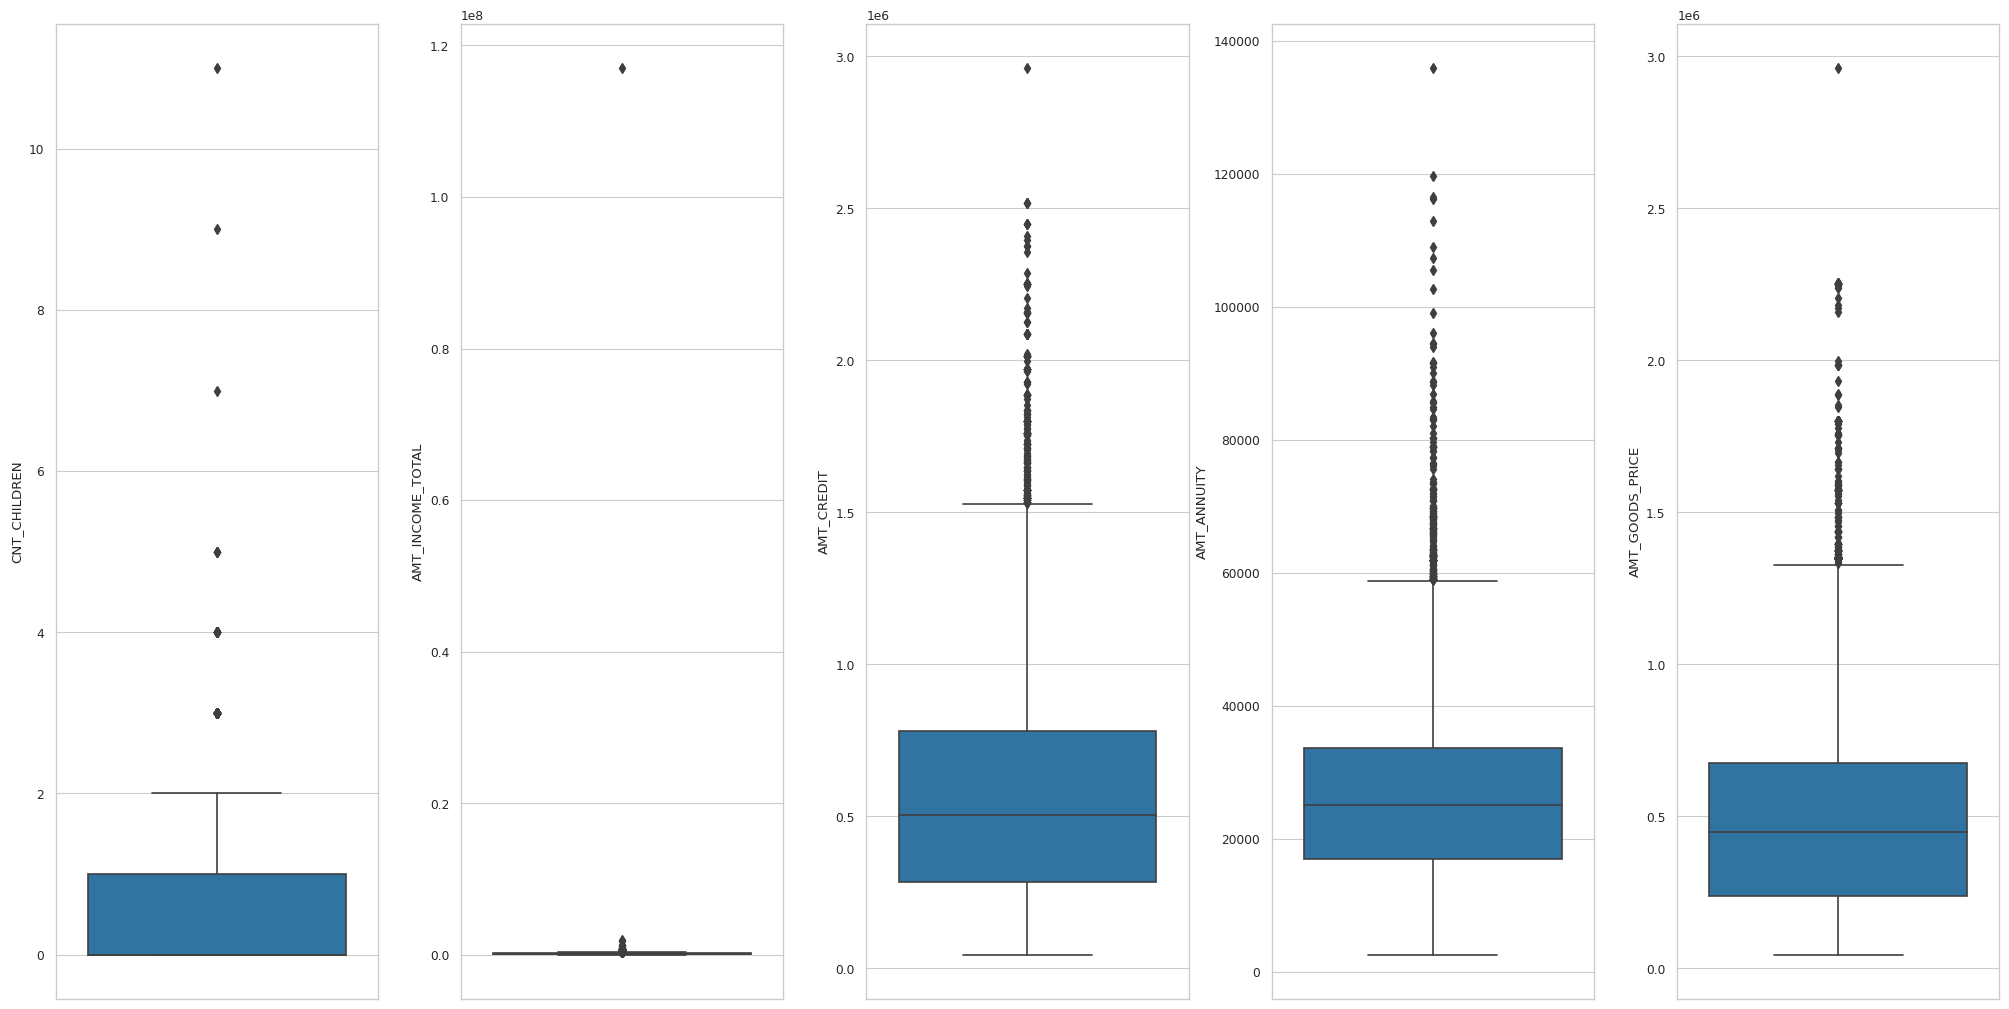

In [67]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [68]:
# dataset that only consist numerical features pt.2
int_features = data[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "CNT_FAM_MEMBERS"]]

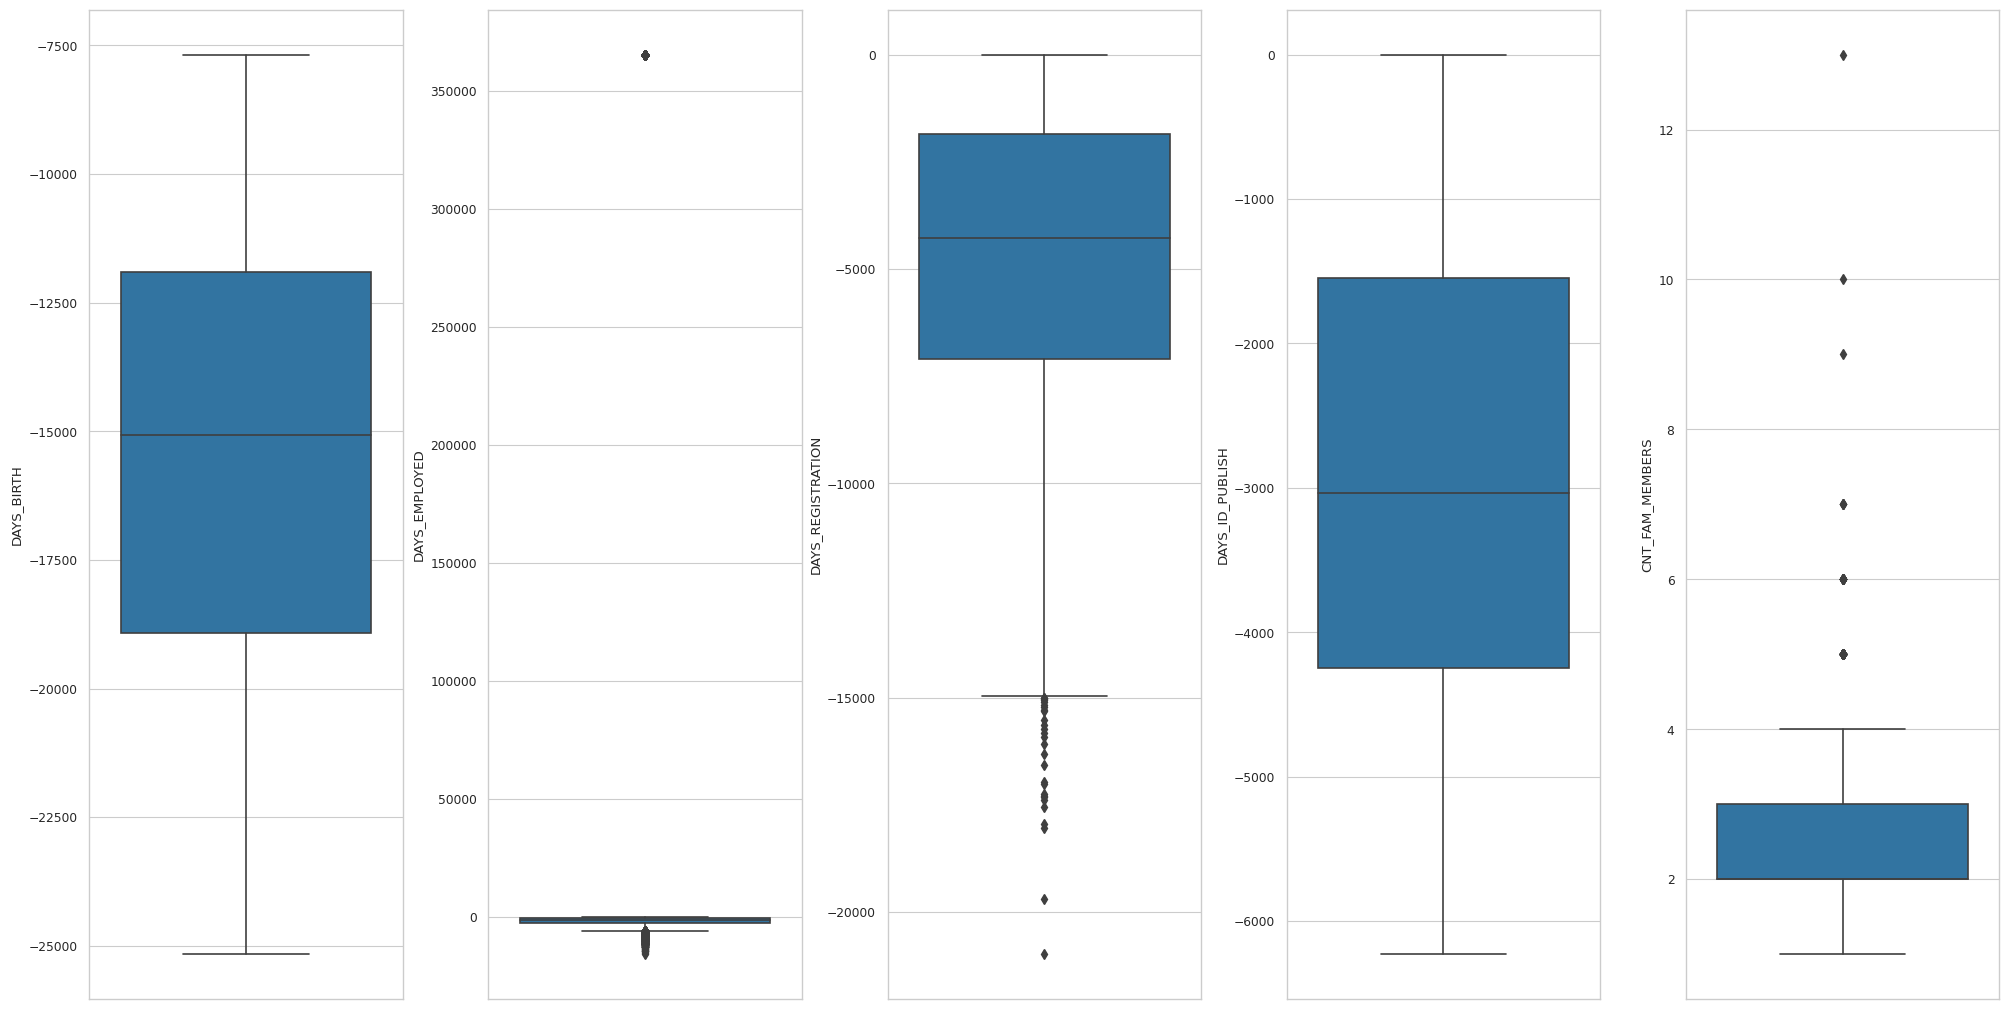

In [69]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [70]:
# dataset that only consist numerical features pt.3
int_features = data[["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "REGION_POPULATION_RELATIVE"]]

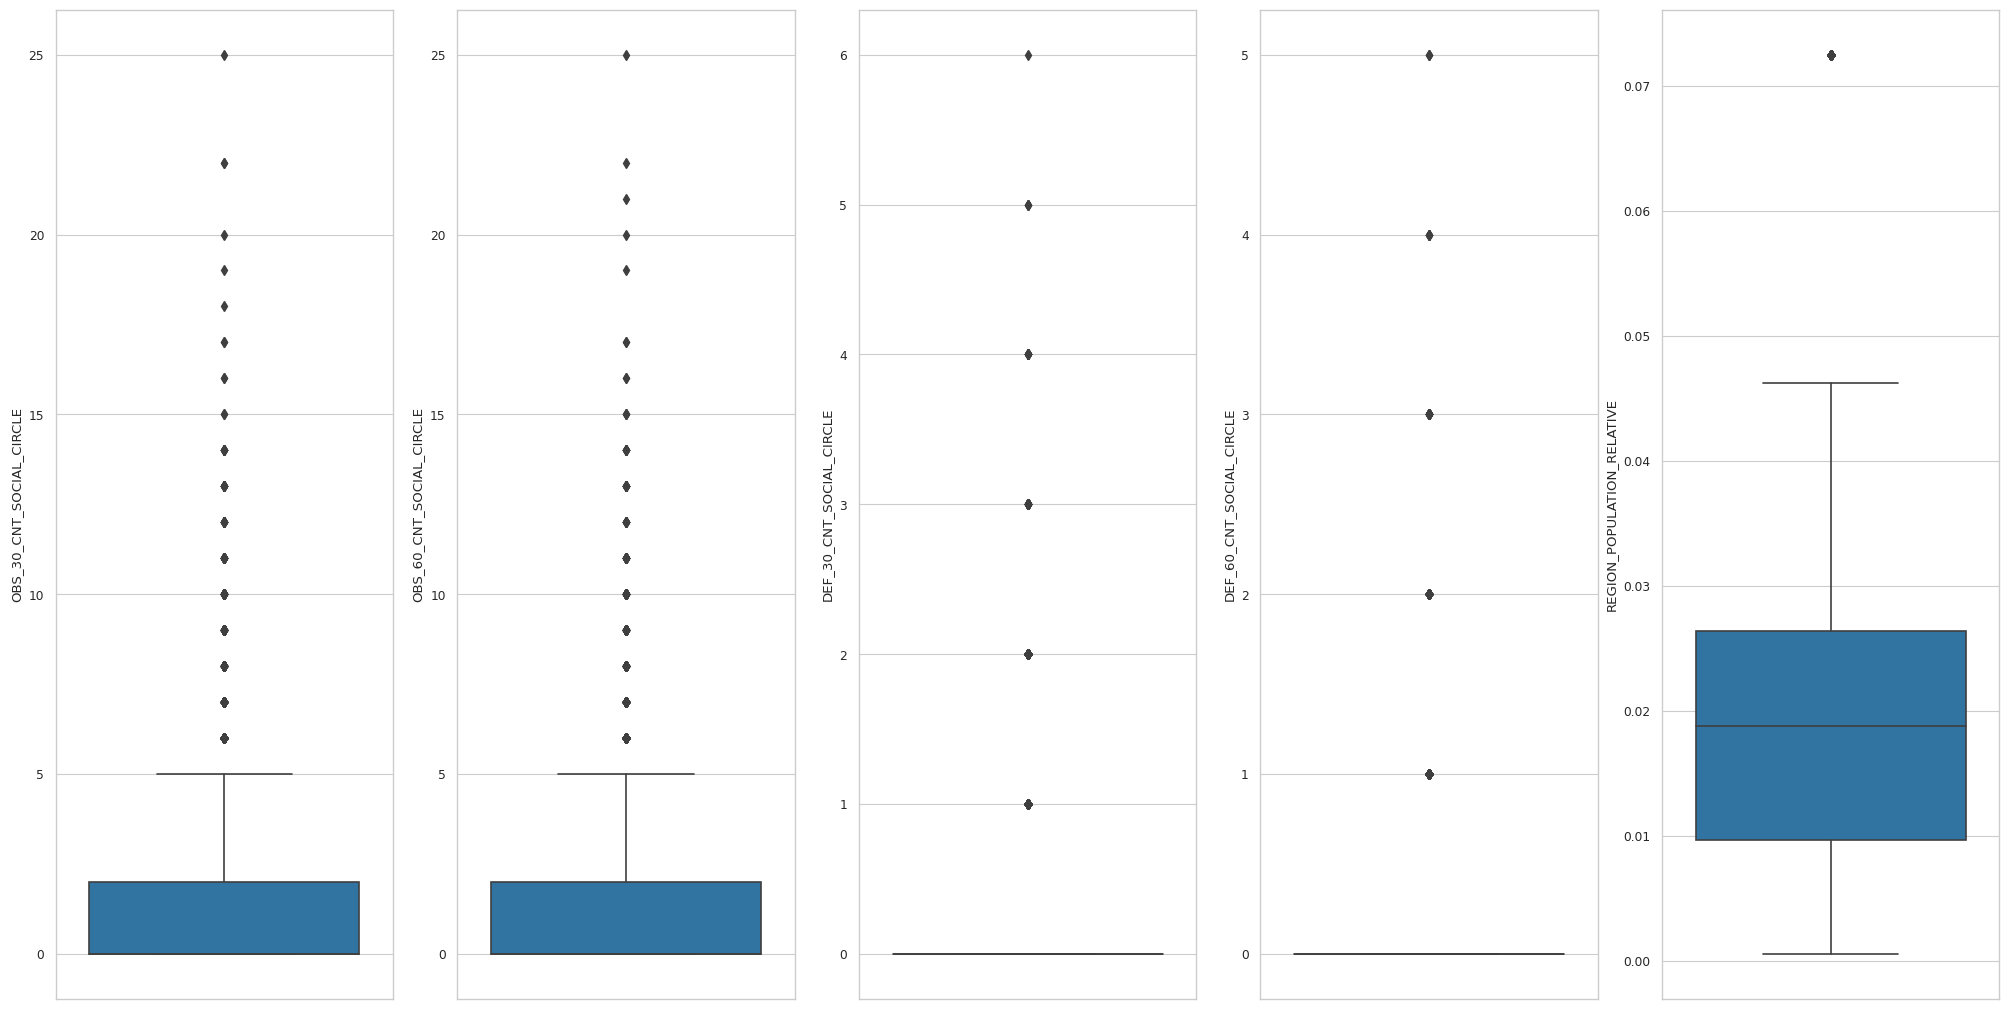

In [71]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [72]:
# dataset that only consist numerical features pt.4
int_features = data[["REGION_RATING_CLIENT", "HOUR_APPR_PROCESS_START", "DAYS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2"]]

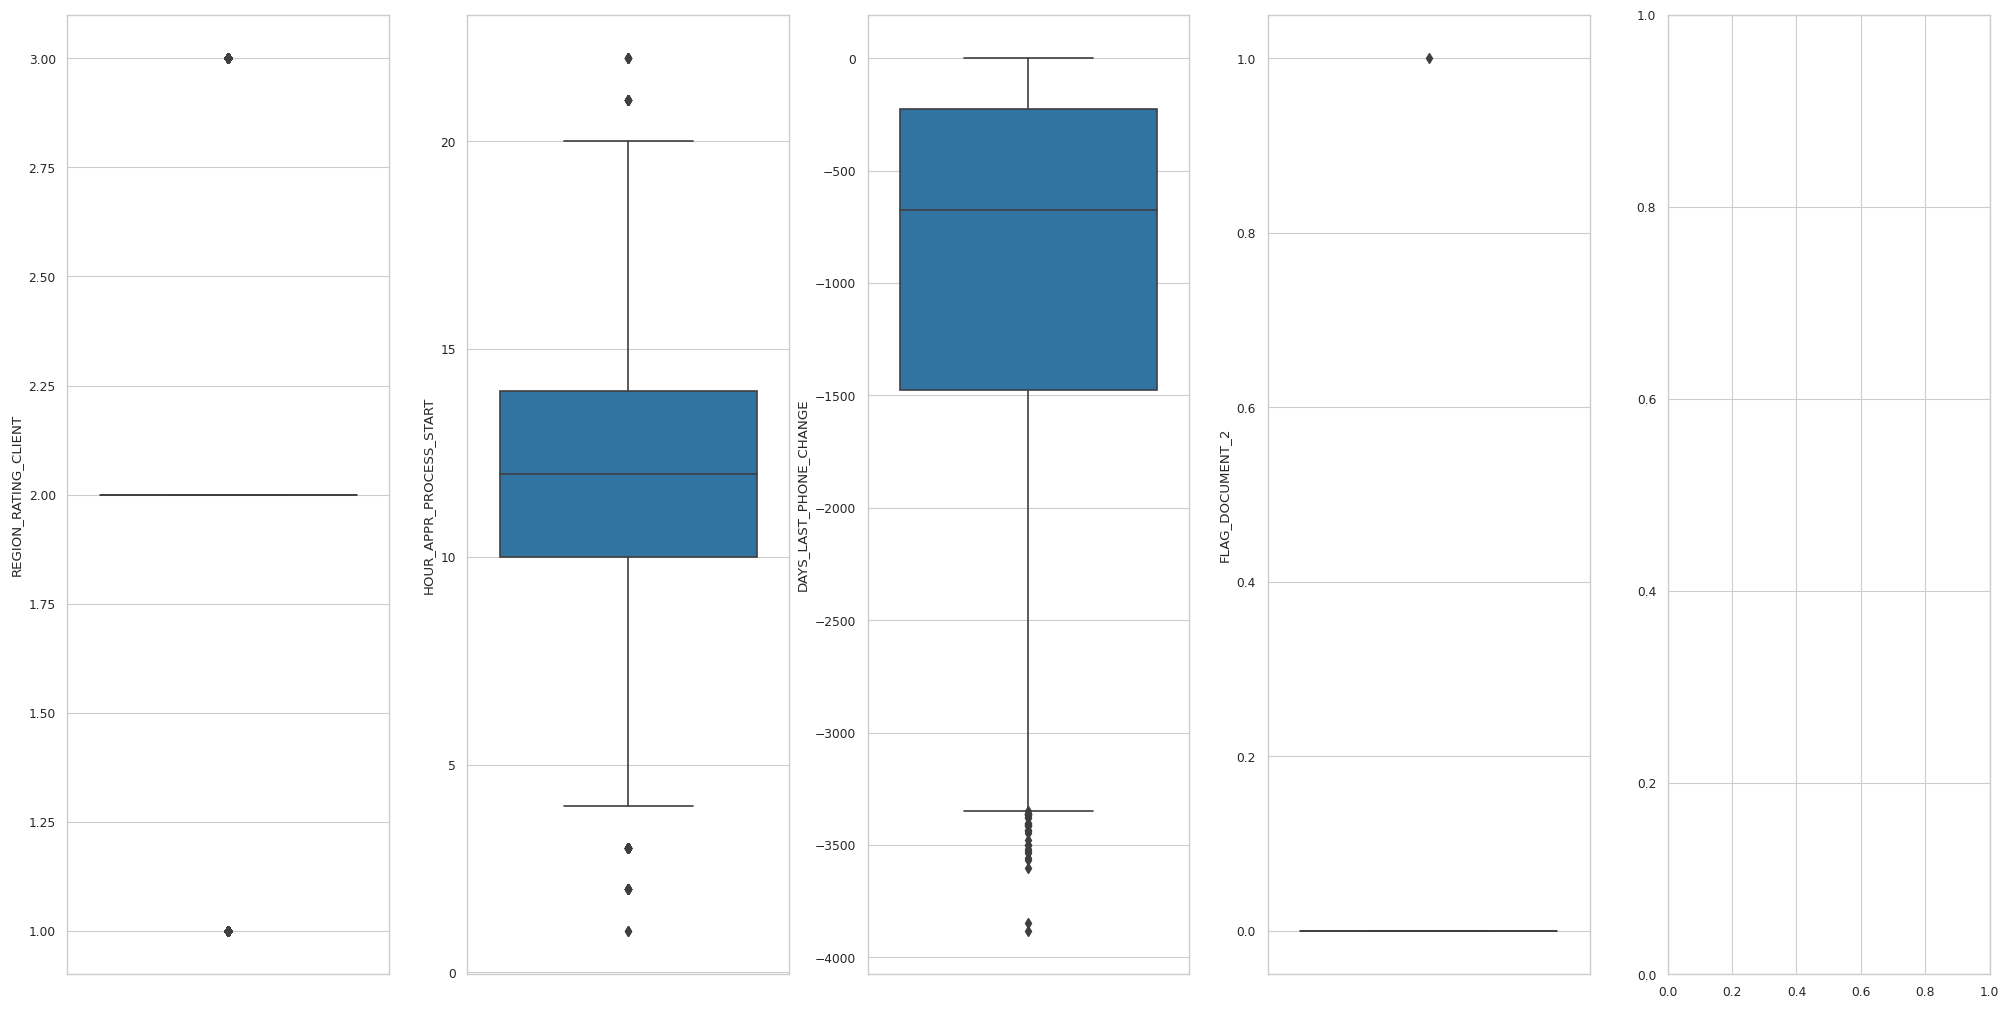

In [73]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
      break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Pencilan pada fitur numerik yang disebutkan di atas tidak akan dihapus karena mungkin ada wawasan yang dapat diambil dari pencilan ini.

# Machine Learning Models

Label Encoding

In [74]:
# label encoder for object features
from sklearn.preprocessing import LabelEncoder
data[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE",
      "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS","NAME_HOUSING_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = data[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "NAME_INCOME_TYPE",
      "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS","NAME_HOUSING_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [75]:
pd.set_option('display.max_columns', None)
data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100004,0,1,1,1,1,0,67500.000,135000.0,6750.0,135000.0,4,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100006,0,0,0,0,1,0,135000.000,312682.5,29686.5,297000.0,4,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100007,0,0,1,0,1,0,121500.000,513000.0,21865.5,513000.0,4,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100008,0,0,1,0,1,0,99000.000,490495.5,27517.5,454500.0,2,4,1,1,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,6,16,0,0,0,0,0,0,33,0.354225,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100009,0,0,0,1,1,1,171000.000,1560726.0,41301.0,1395000.0,0,1,1,1,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,3.0,2,2,3,16,0,0,0,0,0,0,5,0.724000,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
5,100010,0,0,1,1,1,0,360000.000,1530000.0,42075.0,1530000.0,2,1,1,1,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,2.0,3,3,1,16,0,0,0,0,1,1,33,0.714279,2.0,0.0,2.0,0.0,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,100011,0,0,0,0,1,0,112500.000,1019610.0,33826.5,913500.0,1,4,1,1,0.018634,-20099,365243,-7427.0,-3514,1,0,0,1,0,0,2.0,2,2,6,14,0,0,0,0,0,0,57,0.205747,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,100012,0,1,1,0,1,0,135000.000,405000.0,20250.0,405000.0,4,4,3,1,0.019689,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,1.0,2,2,4,8,0,0,0,0,0,0,9,0.746644,2.0,0.0,2.0,0.0,-1673.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,100014,0,0,0,0,1,1,112500.000,652500.0,21177.0,652500.0,4,1,1,1,0.022800,-10197,-679,-4427.0,-738,1,1,0,1,0,0,3.0,2,2,2,15,0,0,0,0,0,0,30,0.651862,0.0,0.0,0.0,0.0,-844.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,100015,0,0,0,0,1,0,38419.155,148365.0,10678.5,135000.0,1,4,1,1,0.015221,-20417,365243,-5246.0,-2512,1,0,0,1,1,0,2.0,2,2,0,7,0,0,0,0,0,0,57,0.555183,0.0,0.0,0.0,0.0,-2396.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
data['DAYS_EMPLOYED'].unique()

array([ -225, -3039, -3038, ..., -3801, -2982, -4582])

In [77]:
data['DAYS_EMPLOYED'].replace(to_replace=["365243"],
           value="365")

0         -225
1        -3039
2        -3038
3        -1588
4        -3130
         ...  
9995    365243
9996     -3801
9997     -2982
9998     -4582
9999     -1046
Name: DAYS_EMPLOYED, Length: 9941, dtype: int64

In [78]:
data.to_csv('baru.csv', index=False)

In [79]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,4,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,4,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,4,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100008,0,0,1,0,1,0,99000.0,490495.5,27517.5,454500.0,2,4,1,1,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,6,16,0,0,0,0,0,0,33,0.354225,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100009,0,0,0,1,1,1,171000.0,1560726.0,41301.0,1395000.0,0,1,1,1,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,3.0,2,2,3,16,0,0,0,0,0,0,5,0.724000,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,172107,1,0,0,0,0,0,225000.0,508495.5,26091.0,454500.0,1,4,1,1,0.005002,-18744,365243,-4046.0,-2292,1,0,0,1,0,0,2.0,3,3,4,10,0,0,0,0,0,0,57,0.612514,1.0,1.0,1.0,1.0,-693.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,172112,1,0,0,0,1,0,112500.0,540000.0,39424.5,540000.0,4,4,1,1,0.026392,-13317,-3801,-503.0,-4808,1,1,1,1,0,0,2.0,2,2,1,12,0,0,0,0,0,0,4,0.618316,0.0,0.0,0.0,0.0,-351.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,172118,1,0,1,0,1,0,135000.0,585000.0,29997.0,585000.0,4,1,1,1,0.008474,-19016,-2982,-9726.0,-2546,1,1,0,1,0,0,2.0,2,2,1,11,0,0,0,0,1,1,35,0.481974,0.0,0.0,0.0,0.0,-504.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9998,172135,1,0,1,1,0,1,405000.0,640080.0,29970.0,450000.0,4,4,0,4,0.020713,-14223,-4582,-1634.0,-2313,1,1,0,1,0,0,3.0,3,2,5,10,0,0,0,0,0,0,42,0.546001,0.0,0.0,0.0,0.0,-559.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
new = pd.read_csv('/content/baru (2).csv')

In [81]:
pd.set_option('display.max_columns', None)
new.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100004,0,1,1,1,1,0,67500.000,135000.0,6750.0,135000.0,4,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100006,0,0,0,0,1,0,135000.000,312682.5,29686.5,297000.0,4,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100007,0,0,1,0,1,0,121500.000,513000.0,21865.5,513000.0,4,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100008,0,0,1,0,1,0,99000.000,490495.5,27517.5,454500.0,2,4,1,1,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,6,16,0,0,0,0,0,0,33,0.354225,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100009,0,0,0,1,1,1,171000.000,1560726.0,41301.0,1395000.0,0,1,1,1,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,3.0,2,2,3,16,0,0,0,0,0,0,5,0.724000,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
5,100010,0,0,1,1,1,0,360000.000,1530000.0,42075.0,1530000.0,2,1,1,1,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,2.0,3,3,1,16,0,0,0,0,1,1,33,0.714279,2.0,0.0,2.0,0.0,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,100011,0,0,0,0,1,0,112500.000,1019610.0,33826.5,913500.0,1,4,1,1,0.018634,-20099,-3652,-7427.0,-3514,1,0,0,1,0,0,2.0,2,2,6,14,0,0,0,0,0,0,57,0.205747,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,100012,0,1,1,0,1,0,135000.000,405000.0,20250.0,405000.0,4,4,3,1,0.019689,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,1.0,2,2,4,8,0,0,0,0,0,0,9,0.746644,2.0,0.0,2.0,0.0,-1673.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,100014,0,0,0,0,1,1,112500.000,652500.0,21177.0,652500.0,4,1,1,1,0.022800,-10197,-679,-4427.0,-738,1,1,0,1,0,0,3.0,2,2,2,15,0,0,0,0,0,0,30,0.651862,0.0,0.0,0.0,0.0,-844.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,100015,0,0,0,0,1,0,38419.155,148365.0,10678.5,135000.0,1,4,1,1,0.015221,-20417,-3652,-5246.0,-2512,1,0,0,1,1,0,2.0,2,2,0,7,0,0,0,0,0,0,57,0.555183,0.0,0.0,0.0,0.0,-2396.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Feature Selection

Convert Negative Values to Positive Values

The features that have negative values are DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH, DAYS_REGISTRATION, and DAYS_LAST_PHONE_CHANGE

In [82]:
# new.iloc[:,15:20] = data.iloc[:,15:20].abs()
# data.iloc[:,45] = data.iloc[:,45].abs()

In [83]:
pd.set_option('display.max_columns', None)
new.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100004,0,1,1,1,1,0,67500.000,135000.0,6750.0,135000.0,4,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100006,0,0,0,0,1,0,135000.000,312682.5,29686.5,297000.0,4,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100007,0,0,1,0,1,0,121500.000,513000.0,21865.5,513000.0,4,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100008,0,0,1,0,1,0,99000.000,490495.5,27517.5,454500.0,2,4,1,1,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,6,16,0,0,0,0,0,0,33,0.354225,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100009,0,0,0,1,1,1,171000.000,1560726.0,41301.0,1395000.0,0,1,1,1,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,3.0,2,2,3,16,0,0,0,0,0,0,5,0.724000,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
5,100010,0,0,1,1,1,0,360000.000,1530000.0,42075.0,1530000.0,2,1,1,1,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,2.0,3,3,1,16,0,0,0,0,1,1,33,0.714279,2.0,0.0,2.0,0.0,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,100011,0,0,0,0,1,0,112500.000,1019610.0,33826.5,913500.0,1,4,1,1,0.018634,-20099,-3652,-7427.0,-3514,1,0,0,1,0,0,2.0,2,2,6,14,0,0,0,0,0,0,57,0.205747,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,100012,0,1,1,0,1,0,135000.000,405000.0,20250.0,405000.0,4,4,3,1,0.019689,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,1.0,2,2,4,8,0,0,0,0,0,0,9,0.746644,2.0,0.0,2.0,0.0,-1673.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,100014,0,0,0,0,1,1,112500.000,652500.0,21177.0,652500.0,4,1,1,1,0.022800,-10197,-679,-4427.0,-738,1,1,0,1,0,0,3.0,2,2,2,15,0,0,0,0,0,0,30,0.651862,0.0,0.0,0.0,0.0,-844.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,100015,0,0,0,0,1,0,38419.155,148365.0,10678.5,135000.0,1,4,1,1,0.015221,-20417,-3652,-5246.0,-2512,1,0,0,1,1,0,2.0,2,2,0,7,0,0,0,0,0,0,57,0.555183,0.0,0.0,0.0,0.0,-2396.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
new.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9.941000e+03,9.941000e+03,9941.000000,9.941000e+03,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.0,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.0,9941.000000,9941.000000,9941.0,9941.000000,9941.000000,9941.0,9941.000000,9941.0,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000
mean,119705.118097,0.501056,0.078161,0.383664,0.324414,0.692385,0.438789,1.761404e+05,5.793811e+05,26847.670405,5.149843e+05,2.518459,3.311940,1.426215,1.331858,0.019989,-15502.148074,-2359.017101,-4744.300674,-2873.921638,1.0,0.844885,0.214465,0.998391,0.257218,0.054220,2.163766,2.101398,2.079368,3.091741,11.882104,0.018207,0.050096,0.037119,0.099688,0.266573,0.198270,28.684639,0.466479,1.463635,0.171713,1.447339,0.123931,-886.566643,0.000101,0.742078,0.0,0.015391,0.074942,0.0,0.077356,0.003621,0.0,0.003923,0.0,0.001308,0.002213,0.000402,0.007444,0.000302,0.006337,0.000503,0.000402,0.000201
std,22048.033246,0.500024,0.268439,0.486302,0.468179,0.461529,0.744666,1.175491e+06,3.755782e+05,13489.394990,3.434316e+05,1.741720,1.225224,1.033305,1.020031,0.013061,4303.206962,2023.170875,3429.142532,1530.205102,0.0,0.362033,0.410472,0.040088,0.437122,0.226462,0.934009,0.506675,0.501745,2.145332,3.266836,0.133708,0.218153,0.189063,0.299599,0.442189,0.398717,20.259678,0.208296,2.318418,0.495237,2.295777,0.414199,797.866419,0.010030,0.437513,0.0,0.123107,0.263311,0.0,0.267170,0.060072,0.0,0.062515,0.0,0.036141,0.046993,0.020056,0.085961,0.017370,0.079359,0.022422,0.020056,0.014183
min,100004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2596.500000,4.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000533,-25160.000000,-15632.000000,-20981.000000,-6228.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,-3882.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,102925.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000e+05,2.842560e+05,16960.500000,2.385000e+05,1.000000,4.000000,1.000000,1.000000,0.009657,-18916.000000,-3652.000000,-7103.000000,-4244.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,1.000000,10.000000,0

In [85]:
new

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,4,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,1,9,0,0,0,0,0,0,11,0.555912,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,4,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,6,17,0,0,0,0,0,0,5,0.650442,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,4,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,4,11,0,0,0,0,1,1,37,0.322738,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100008,0,0,1,0,1,0,99000.0,490495.5,27517.5,454500.0,2,4,1,1,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,6,16,0,0,0,0,0,0,33,0.354225,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100009,0,0,0,1,1,1,171000.0,1560726.0,41301.0,1395000.0,0,1,1,1,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,3.0,2,2,3,16,0,0,0,0,0,0,5,0.724000,1.0,0.0,1.0,0.0,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9936,172107,1,0,0,0,0,0,225000.0,508495.5,26091.0,454500.0,1,4,1,1,0.005002,-18744,-3652,-4046.0,-2292,1,0,0,1,0,0,2.0,3,3,4,10,0,0,0,0,0,0,57,0.612514,1.0,1.0,1.0,1.0,-693.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9937,172112,1,0,0,0,1,0,112500.0,540000.0,39424.5,540000.0,4,4,1,1,0.026392,-13317,-3801,-503.0,-4808,1,1,1,1,0,0,2.0,2,2,1,12,0,0,0,0,0,0,4,0.618316,0.0,0.0,0.0,0.0,-351.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9938,172118,1,0,1,0,1,0,135000.0,585000.0,29997.0,585000.0,4,1,1,1,0.008474,-19016,-2982,-9726.0,-2546,1,1,0,1,0,0,2.0,2,2,1,11,0,0,0,0,1,1,35,0.481974,0.0,0.0,0.0,0.0,-504.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9939,172135,1,0,1,1,0,1,405000.0,640080.0,29970.0,450000.0,4,4,0,4,0.020713,-14223,-4582,-1634.0,-2313,1,1,0,1,0,0,3.0,3,2,5,10,0,0,0,0,0,0,42,0.546001,0.0,0.0,0.0,0.0,-559.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
# Creating Age Column
new['AGE'] = (new['DAYS_BIRTH'])/-365
new['CREDIT_TERM'] = (new['AMT_CREDIT'] / new['AMT_ANNUITY'])

In [87]:
new['YEAR_EMPLOYED'] = (new['DAYS_EMPLOYED'])/-365

In [88]:
new['JLH_INCOME_TOTAL'] = (new['AMT_INCOME_TOTAL'])*196.8
new['JLH_CREDIT'] = (new['AMT_CREDIT'])*196.8
new['JLH_ANNUITY'] = (new['AMT_ANNUITY'])*196.8
new['JLH_GOODS_PRICE'] = (new['AMT_GOODS_PRICE'])*196.8

In [89]:
to_drop = ['FLAG_PHONE', 'FLAG_WORK_PHONE','FLAG_EMAIL', 'FLAG_EMP_PHONE', 'FLAG_CONT_MOBILE','NAME_HOUSING_TYPE','AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_BIRTH', 'DAYS_REGISTRATION','DAYS_ID_PUBLISH','WEEKDAY_APPR_PROCESS_START','REGION_POPULATION_RELATIVE','EXT_SOURCE_2',
           'HOUR_APPR_PROCESS_START','ORGANIZATION_TYPE','FLAG_MOBIL','DAYS_LAST_PHONE_CHANGE','REGION_RATING_CLIENT','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
           'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
           'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',]

new.drop(to_drop, inplace = True, axis = 1)

In [90]:
new = new.rename(index=str, columns={'JLH_INCOME_TOTAL':'AMT_INCOME_TOTAL','JLH_CREDIT':'AMT_CREDIT','JLH_ANNUITY':'AMT_ANNUITY'})

In [91]:
new['YEAR_EMPLOYED'].describe()

count    9941.000000
mean        6.463061
std         5.542934
min         0.010959
25%         2.167123
50%         5.019178
75%        10.005479
max        42.827397
Name: YEAR_EMPLOYED, dtype: float64

In [92]:
new['YEAR_EMPLOYED']

0        0.616438
1        8.326027
2        8.323288
3        4.350685
4        8.575342
          ...    
9936    10.005479
9937    10.413699
9938     8.169863
9939    12.553425
9940     2.865753
Name: YEAR_EMPLOYED, Length: 9941, dtype: float64

In [93]:
# result=pd.read_csv(r'/content/result.csv')
# fix = pd.read_csv('/content/data_hsl.csv')

In [94]:
new['AMT_INCOME_TOTAL'].describe()

count    9.941000e+03
mean     3.466442e+07
std      2.313367e+08
min      5.047920e+06
25%      2.214000e+07
50%      2.656800e+07
75%      3.985200e+07
max      2.302560e+10
Name: AMT_INCOME_TOTAL, dtype: float64

In [95]:
new.to_csv('data_fix.csv', index = False)

In [96]:
new.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'CNT_FAM_MEMBERS',
 'AGE',
 'CREDIT_TERM',
 'YEAR_EMPLOYED',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'JLH_GOODS_PRICE']

In [97]:
to_drop = ['JLH_GOODS_PRICE']
new.drop(to_drop, inplace = True, axis = 1)

In [98]:
X = new.drop(['TARGET'], axis=1)
y = new['TARGET']

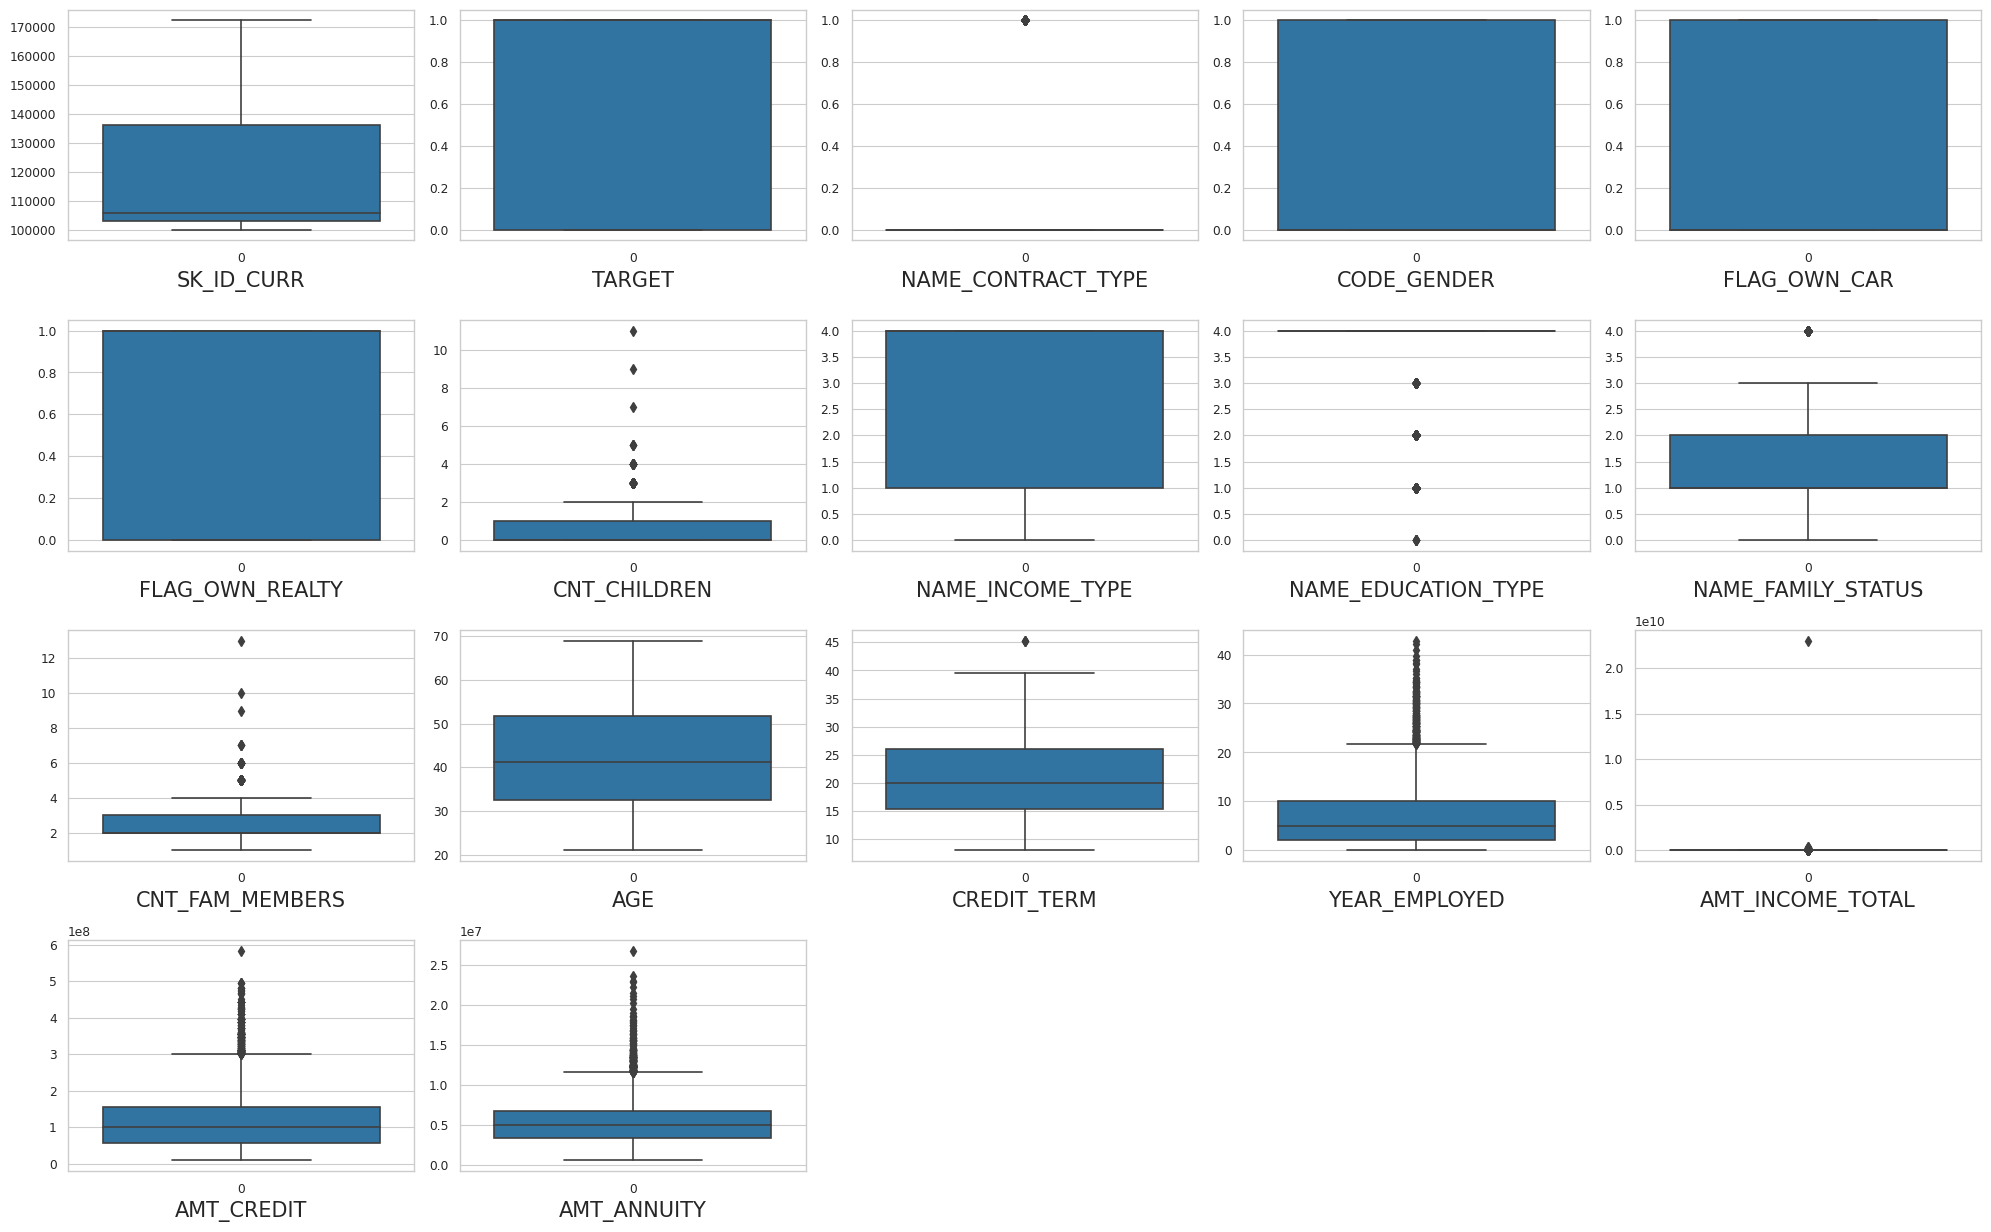

In [99]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in new.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(new[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

In [100]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)

    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

outlier_list = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS',
               'NAME_EDUCATION_TYPE','CREDIT_TERM','YEAR_EMPLOYED']


for i in new[outlier_list]:
    new[i]=treat_outlier(X[i])

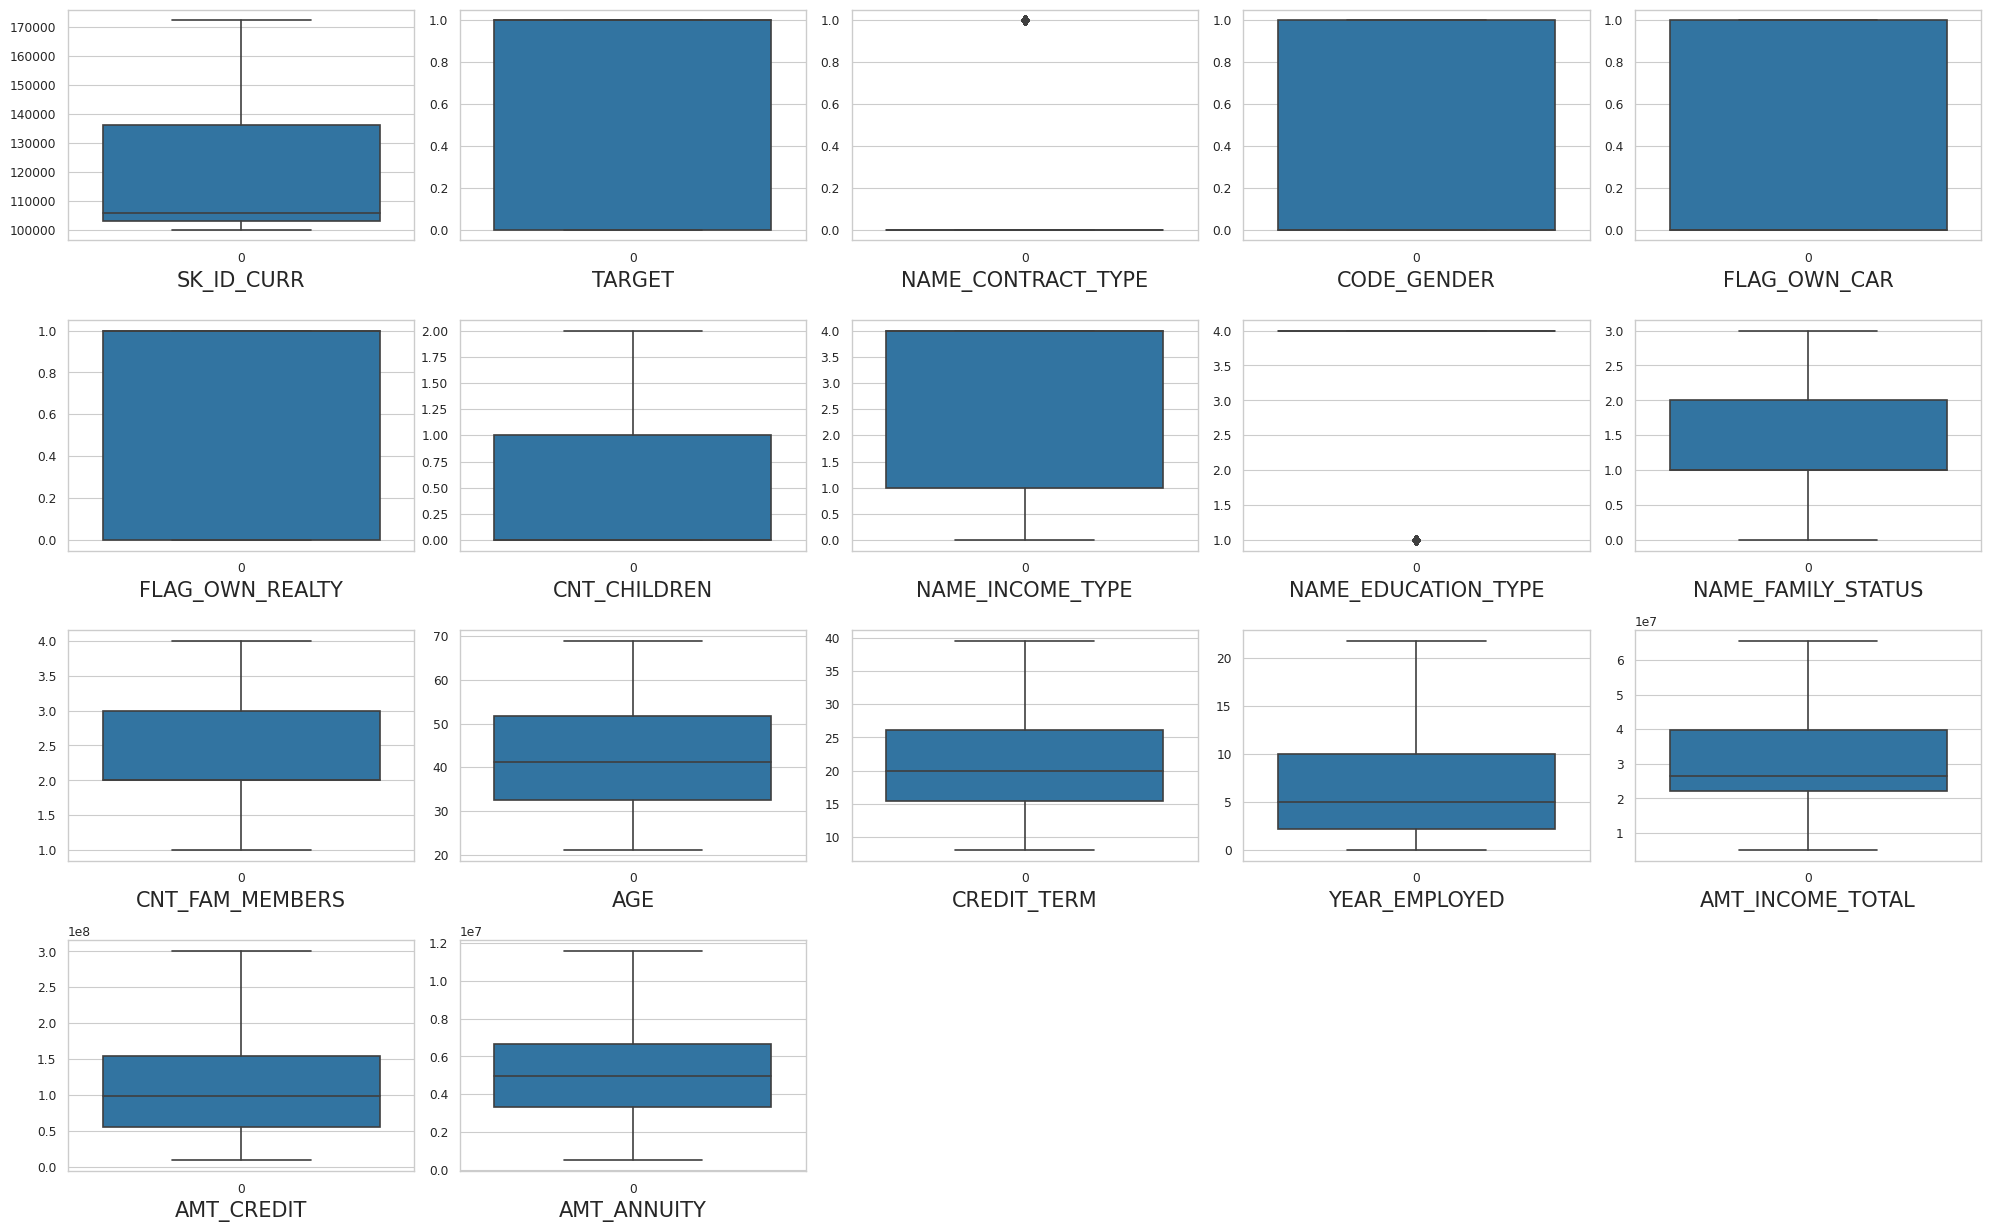

In [101]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in new.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(new[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1
plt.tight_layout()
plt.show()

In [102]:
X

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,AGE,CREDIT_TERM,YEAR_EMPLOYED,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
0,100004,1,1,1,1,0,4,4,3,1.0,52.180822,20.000000,0.616438,13284000.0,26568000.0,1328400.0
1,100006,0,0,0,1,0,4,4,0,2.0,52.068493,10.532818,8.326027,26568000.0,61535916.0,5842303.2
2,100007,0,1,0,1,0,4,4,3,1.0,54.608219,23.461618,8.323288,23911200.0,100958400.0,4303130.4
3,100008,0,1,0,1,0,2,4,1,2.0,46.413699,17.824857,4.350685,19483200.0,96529514.4,5415444.0
4,100009,0,0,1,1,1,0,1,1,3.0,37.747945,37.789061,8.575342,33652800.0,307150876.8,8128036.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9936,172107,0,0,0,0,0,1,4,1,2.0,51.353425,19.489307,10.005479,44280000.0,100071914.4,5134708.8
9937,172112,0,0,0,1,0,4,4,1,2.0,36.484932,13.697067,10.413699,22140000.0,106272000.0,7758741.6
9938,172118,0,1,0,1,0,4,1,1,2.0,52.098630,19.501950,8.169863,26568000.0,115128000.0,5903409.6
9939,172135,0,1,1,0,1,4,4,0,3.0,38.967123,21.357357,12.553425,79704000.0,125967744.0,5898096.0


In [103]:
df_yes =  new[new['TARGET'] == 1]
df_yes

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,AGE,CREDIT_TERM,YEAR_EMPLOYED,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
4960,100031,1,0,0,0,1,0.0,4,4.0,3.0,1.0,51.298630,36.193452,7.200000,22140000.0,192862425.6,5328655.2
4961,100047,1,0,1,0,1,0.0,0,4.0,1.0,2.0,47.895890,34.075026,3.457534,39852000.0,234896544.0,6893510.4
4962,100049,1,0,0,0,0,0.0,4,4.0,0.0,2.0,36.668493,17.767506,9.854795,26568000.0,56850206.4,3199672.8
4963,100096,1,0,0,0,1,0.0,1,4.0,1.0,2.0,67.928767,17.267962,10.005479,15940800.0,49593600.0,2872000.8
4964,100112,1,0,1,1,1,0.0,0,1.0,3.0,1.0,27.942466,14.872947,5.520548,61992000.0,187640928.0,10267646.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9936,172107,1,0,0,0,0,0.0,1,4.0,1.0,2.0,51.353425,19.489307,10.005479,44280000.0,100071914.4,5134708.8
9937,172112,1,0,0,0,1,0.0,4,4.0,1.0,2.0,36.484932,13.697067,10.413699,22140000.0,106272000.0,7758741.6
9938,172118,1,0,1,0,1,0.0,4,1.0,1.0,2.0,52.098630,19.501950,8.169863,26568000.0,115128000.0,5903409.6
9939,172135,1,0,1,1,0,1.0,4,4.0,0.0,3.0,38.967123,21.357357,12.553425,61992000.0,125967744.0,5898096.0


In [104]:
df_yes.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,AGE,CREDIT_TERM,YEAR_EMPLOYED,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
count,4981.000000,4981.0,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4.981000e+03,4.981000e+03,4.981000e+03
mean,136174.466372,1.0,0.059225,0.435455,0.310179,0.688416,0.451717,2.670548,3.383256,1.378237,2.168039,40.754666,20.652057,5.460990,3.071455e+07,1.081090e+08,5.198853e+06
std,20571.590561,0.0,0.236069,0.495866,0.462613,0.463187,0.687472,1.725451,1.212499,0.957259,0.895813,11.505267,7.084028,4.452979,1.312441e+07,6.202042e+07,2.293670e+06
min,100031.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,21.041096,8.036791,0.010959,5.047920e+06,8.856000e+06,5.596992e+05
25%,118612.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,2.000000,31.194521,14.965627,1.854795,2.214000e+07,5.642335e+07,3.456497e+06
50%,136188.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,4.000000,1.000000,2.000000,38.978082,20.000000,4.120548,2.656800e+07,9.791194e+07,5.000098e+06
75%,153956.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,3.000000,49.200000,25.084214,9.189041,3.896640e+07,1.446583e+08,6.494105e+06
max,172145.000000,1.0,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,3.000000,4.000000,68.695890,39.548023,21.736986,6.553440e+07,3.007498e+08,1.155177e+07


In [105]:
df_no =  new[new['TARGET'] == 0]
df_no

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,AGE,CREDIT_TERM,YEAR_EMPLOYED,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
0,100004,0,1,1,1,1,0.0,4,4.0,3.0,1.0,52.180822,20.000000,0.616438,13284000.0,26568000.0,1328400.0
1,100006,0,0,0,0,1,0.0,4,4.0,0.0,2.0,52.068493,10.532818,8.326027,26568000.0,61535916.0,5842303.2
2,100007,0,0,1,0,1,0.0,4,4.0,3.0,1.0,54.608219,23.461618,8.323288,23911200.0,100958400.0,4303130.4
3,100008,0,0,1,0,1,0.0,2,4.0,1.0,2.0,46.413699,17.824857,4.350685,19483200.0,96529514.4,5415444.0
4,100009,0,0,0,1,1,1.0,0,1.0,1.0,3.0,37.747945,37.789061,8.575342,33652800.0,253547280.0,8128036.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,106329,0,0,0,0,1,0.0,0,4.0,2.0,1.0,59.008219,9.481837,6.767123,28339200.0,55941580.8,5899867.2
4956,106330,0,0,1,0,0,1.0,0,4.0,1.0,3.0,57.649315,27.712919,0.421918,22140000.0,153881856.0,5552712.0
4957,106331,0,0,1,1,1,0.0,4,4.0,1.0,2.0,47.591781,12.630444,6.876712,39852000.0,155635344.0,10267646.4
4958,106332,0,0,1,1,0,0.0,4,4.0,1.0,2.0,51.939726,8.863284,9.156164,35424000.0,35424000.0,3996712.8


In [106]:
df_no.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,AGE,CREDIT_TERM,YEAR_EMPLOYED,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
count,4960.000000,4960.0,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4.960000e+03,4.960000e+03,4.960000e+03
mean,103166.040726,0.0,0.097177,0.331653,0.338710,0.696371,0.382863,2.365726,3.119960,1.378831,2.118548,44.195881,21.725168,6.955128,3.163235e+07,1.149721e+08,5.204275e+06
std,1834.858724,0.0,0.296229,0.470855,0.473319,0.459871,0.644511,1.744786,1.366026,0.904959,0.843261,11.821165,7.786108,4.864352,1.416540e+07,7.092363e+07,2.515776e+06
min,100004.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,21.109589,8.256593,0.046575,5.047920e+06,8.856000e+06,5.109912e+05
25%,101590.750000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,34.473973,16.278273,2.651370,2.214000e+07,5.313600e+07,3.226684e+06
50%,103154.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,4.000000,1.000000,2.000000,43.636986,20.000000,6.406849,2.833920e+07,1.002898e+08,4.884527e+06
75%,104754.250000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,3.000000,53.894521,27.551388,10.005479,3.985200e+07,1.591423e+08,6.808493e+06
max,106333.000000,0.0,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,3.000000,4.000000,68.931507,39.559741,21.745205,6.553440e+07,3.007498e+08,1.157745e+07


In [107]:
X.describe()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,AGE,CREDIT_TERM,YEAR_EMPLOYED,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
count,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9.941000e+03,9.941000e+03,9.941000e+03
mean,119705.118097,0.078161,0.383664,0.324414,0.692385,0.438789,2.518459,3.311940,1.426215,2.163766,42.471639,21.190814,6.463061,3.466442e+07,1.140222e+08,5.283622e+06
std,22048.033246,0.268439,0.486302,0.468179,0.461529,0.744666,1.741720,1.225224,1.033305,0.934009,11.789608,7.469835,5.542934,2.313367e+08,7.391378e+07,2.654713e+06
min,100004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21.041096,8.036791,0.010959,5.047920e+06,8.856000e+06,5.109912e+05
25%,102925.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,2.000000,32.632877,15.438440,2.167123,2.214000e+07,5.594158e+07,3.337826e+06
50%,105863.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,4.000000,1.000000,2.000000,41.279452,20.000000,5.019178,2.656800e+07,9.918720e+07,4.945190e+06
75%,136253.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,2.000000,3.000000,51.824658,26.123302,10.005479,3.985200e+07,1.538819e+08,6.642000e+06
max,172145.000000,1.000000,1.000000,1.000000,1.000000,11.000000,4.000000,4.000000,4.000000,13.000000,68.931507,45.295526,42.827397,2.302560e+10,5.827248e+08,2.675220e+07


In [108]:
# feature selection
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
featureScores.sort_values(by=['Score'], ascending=False)

The features that correlate well with target feature:



,Features,Score
14,AMT_CREDIT,1.671901e+09
13,AMT_INCOME_TOTAL,8.667096e+08
0,SK_ID_CURR,2.262065e+07
15,AMT_ANNUITY,2.919958e+06
12,YEAR_EMPLOYED,1.118108e+03
10,AGE,6.929356e+02
11,CREDIT_TERM,1.333848e+02
6,NAME_INCOME_TYPE,9.169099e+01
2,CODE_GENDER,6.979508e+01
7,NAME_EDUCATION_TYPE,5.737818e+01


In [109]:
# # splitting data into training set and test set

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# X_test

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

In [111]:
# Now since we want the valid and test size to be equal (10% each of overall data).
# we have to define valid_size=0.5 (that is 50% of remaining data)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)


(7952, 16)
(7952,)
(994, 16)
(994,)
(995, 16)
(995,)


(None, None)

In [112]:
# pip install fast-ml
# from fast_ml.model_development import train_valid_test_split
# X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(X, y, train_size=0.70, valid_size=0.15, test_size=0.15)

In [113]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_valid_sc = scaler.transform(X_valid)
X_test_sc = scaler.transform(X_test)

In [114]:
# train the model
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train_sc, y_train)
print(rf_model)

RandomForestClassifier()


In [115]:
# predict data validation
y_valid_pred_dt = rf_model.predict(X_valid_sc)

# print classification report
from sklearn.metrics import confusion_matrix, classification_report

print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_valid, y_valid_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       527
           1       1.00      0.90      0.95       467

    accuracy                           0.95       994
   macro avg       0.96      0.95      0.95       994
weighted avg       0.96      0.95      0.95       994



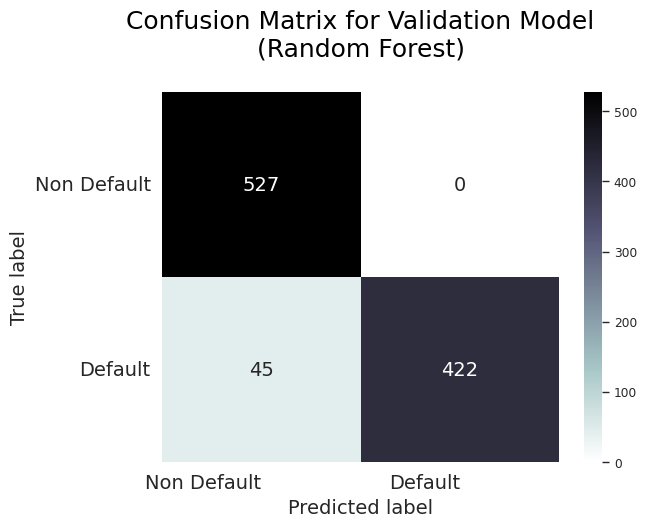

In [116]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_valid, y_valid_pred_dt)), ('Non Default', 'Default'), ('Non Default', 'Default'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Validation Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [117]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test_sc)
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print('Classification Report Testing (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       490
           1       1.00      0.93      0.96       505

    accuracy                           0.96       995
   macro avg       0.96      0.96      0.96       995
weighted avg       0.97      0.96      0.96       995



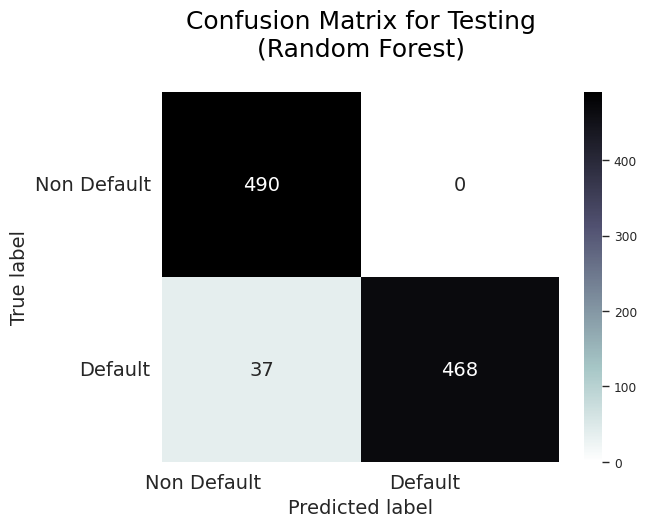

In [118]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('Non Default', 'Default'), ('Non Default', 'Default'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [119]:
acc_rf_train=round(rf_model.score(X_valid_sc,y_valid)*100,2)
acc_rf_test=round(rf_model.score(X_test_sc,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

Training Accuracy: % 95.47
Test Accuracy: % 96.28


#### Cara Menyimpan Data test, train, dan hasil prediksi  ####
Datanya memiliki tipe data string, array

In [120]:
X_test_sc

array([[4.43991628e-02, 0.00000000e+00, 1.00000000e+00, ...,
        7.42470465e-04, 1.63028759e-01, 1.08163747e-01],
       [4.24377261e-01, 0.00000000e+00, 0.00000000e+00, ...,
        9.34820326e-04, 1.08827812e-01, 1.03843947e-01],
       [6.19120888e-01, 0.00000000e+00, 1.00000000e+00, ...,
        9.34820326e-04, 2.11867492e-01, 9.88154298e-02],
       ...,
       [7.23582983e-02, 0.00000000e+00, 1.00000000e+00, ...,
        2.47361922e-03, 2.74845286e-01, 2.58918025e-01],
       [7.67940561e-02, 0.00000000e+00, 0.00000000e+00, ...,
        4.34710687e-04, 1.45613396e-01, 9.60143093e-02],
       [5.46984378e-02, 1.00000000e+00, 1.00000000e+00, ...,
        5.50120603e-04, 1.18310885e-01, 1.07083797e-01]])

In [121]:
# y_test_pred_rf

In [122]:
# hsl = pd.concat([X_test,y_test], axis = 1)
X_test.to_csv('test_new.csv', index = False)

In [123]:
X_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,AGE,CREDIT_TERM,YEAR_EMPLOYED,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
5168,103207,0,1,1,1,1,4,1,1,3.0,31.301370,26.326811,7.410959,22140000.0,88177420.8,3349339.2
7054,130619,0,0,0,1,0,4,4,3,1.0,37.575342,19.099617,0.271233,26568000.0,61806024.0,3235982.4
8057,144668,0,1,0,0,0,4,4,3,1.0,28.112329,36.062767,1.271233,26568000.0,111939840.0,3104028.0
8225,146959,0,0,0,0,0,1,4,2,1.0,63.369863,20.718750,10.005479,33298560.0,164402784.0,7934976.0
6818,127194,0,1,0,0,0,0,2,3,1.0,22.263014,20.562916,3.369863,22140000.0,54704397.6,2660342.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,101104,0,0,0,1,0,1,4,0,2.0,62.808219,22.578650,10.005479,24442560.0,106016947.2,4695451.2
702,100876,0,0,1,1,1,4,1,1,3.0,36.890411,13.301378,1.041096,27453600.0,62420630.4,4692794.4
4088,105224,0,1,1,0,0,4,4,0,2.0,41.868493,19.517517,3.794521,61992000.0,142581600.0,7305314.4
5321,105544,0,0,0,0,1,4,1,1,3.0,43.602740,26.300409,2.150685,15055200.0,79704000.0,3030523.2


In [124]:
train = pd.concat([X_train,y_train], axis = 1)
train.to_csv('train.csv', index = False)

In [125]:
# hsl_pred = pd.DataFrame(X_test)
# hsl_pred1 = pd.DataFrame(y_test)
# hsl_pred2 = pd.DataFrame(y_test_pred_rf)

In [126]:
# satu = pd.Series(X_test)
# dua = pd.Series(y_test)
# tiga = pd.Series(y_test_pred_rf)

In [127]:
e_dataframe = pd.DataFrame(y_test_pred_rf)
dataframe=pd.DataFrame(y_test_pred_rf, columns=['Predicted'])
print (dataframe)

     Predicted
0            0
1            1
2            1
3            1
4            1
..         ...
990          0
991          0
992          0
993          0
994          0

[995 rows x 1 columns]


In [128]:
dataframe.to_csv('hsl.csv', index = False)

In [129]:
# e_dataframe = pd.DataFrame(e)

# e_dataframe.rename(index=str, columns={'TARGET':'new_column_name'})

In [130]:
# hsl_pred2 = pd.DataFrame(y_test_pred_rf)
# hsl_pred = pd.Series(['hsl', 'y_test_pred_rf'])
# fix = pd.concat([hsl,hsl_pred2], axis = 1)

In [131]:
# df.to_csv('hsl.csv', index = False)

In [132]:
final = pd.read_csv('/content/hsl.csv')

In [133]:
dt = pd.read_csv('/content/test_new.csv')

In [134]:
dt

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,AGE,CREDIT_TERM,YEAR_EMPLOYED,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY
0,103207,0,1,1,1,1,4,1,1,3.0,31.301370,26.326811,7.410959,22140000.0,88177420.8,3349339.2
1,130619,0,0,0,1,0,4,4,3,1.0,37.575342,19.099617,0.271233,26568000.0,61806024.0,3235982.4
2,144668,0,1,0,0,0,4,4,3,1.0,28.112329,36.062767,1.271233,26568000.0,111939840.0,3104028.0
3,146959,0,0,0,0,0,1,4,2,1.0,63.369863,20.718750,10.005479,33298560.0,164402784.0,7934976.0
4,127194,0,1,0,0,0,0,2,3,1.0,22.263014,20.562916,3.369863,22140000.0,54704397.6,2660342.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,101104,0,0,0,1,0,1,4,0,2.0,62.808219,22.578650,10.005479,24442560.0,106016947.2,4695451.2
991,100876,0,0,1,1,1,4,1,1,3.0,36.890411,13.301378,1.041096,27453600.0,62420630.4,4692794.4
992,105224,0,1,1,0,0,4,4,0,2.0,41.868493,19.517517,3.794521,61992000.0,142581600.0,7305314.4
993,105544,0,0,0,0,1,4,1,1,3.0,43.602740,26.300409,2.150685,15055200.0,79704000.0,3030523.2


In [135]:
fix = pd.concat([dt,final], axis = 1)

In [136]:
fix

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,AGE,CREDIT_TERM,YEAR_EMPLOYED,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,Predicted
0,103207,0,1,1,1,1,4,1,1,3.0,31.301370,26.326811,7.410959,22140000.0,88177420.8,3349339.2,0
1,130619,0,0,0,1,0,4,4,3,1.0,37.575342,19.099617,0.271233,26568000.0,61806024.0,3235982.4,1
2,144668,0,1,0,0,0,4,4,3,1.0,28.112329,36.062767,1.271233,26568000.0,111939840.0,3104028.0,1
3,146959,0,0,0,0,0,1,4,2,1.0,63.369863,20.718750,10.005479,33298560.0,164402784.0,7934976.0,1
4,127194,0,1,0,0,0,0,2,3,1.0,22.263014,20.562916,3.369863,22140000.0,54704397.6,2660342.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,101104,0,0,0,1,0,1,4,0,2.0,62.808219,22.578650,10.005479,24442560.0,106016947.2,4695451.2,0
991,100876,0,0,1,1,1,4,1,1,3.0,36.890411,13.301378,1.041096,27453600.0,62420630.4,4692794.4,0
992,105224,0,1,1,0,0,4,4,0,2.0,41.868493,19.517517,3.794521,61992000.0,142581600.0,7305314.4,0
993,105544,0,0,0,0,1,4,1,1,3.0,43.602740,26.300409,2.150685,15055200.0,79704000.0,3030523.2,0


In [137]:
output = pd.DataFrame(fix)

output2 = output.rename(index=str, columns={'TARGET':'Kelas','JLH_INCOME_TOTAL':'AMT_INCOME_TOTAL','JLH_CREDIT':'AMT_CREDIT','JLH_ANNUITY':'AMT_ANNUITY'})

In [138]:
output2.to_csv('output.csv', index = False)

In [139]:
hsl_pred = pd.read_csv('/content/output.csv')

In [140]:
pd.set_option('display.max_columns', None)
hsl_pred.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,AGE,CREDIT_TERM,YEAR_EMPLOYED,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,Predicted
0,103207,0,1,1,1,1,4,1,1,3.0,31.301370,26.326811,7.410959,22140000.0,88177420.8,3349339.2,0
1,130619,0,0,0,1,0,4,4,3,1.0,37.575342,19.099617,0.271233,26568000.0,61806024.0,3235982.4,1
2,144668,0,1,0,0,0,4,4,3,1.0,28.112329,36.062767,1.271233,26568000.0,111939840.0,3104028.0,1
3,146959,0,0,0,0,0,1,4,2,1.0,63.369863,20.718750,10.005479,33298560.0,164402784.0,7934976.0,1
4,127194,0,1,0,0,0,0,2,3,1.0,22.263014,20.562916,3.369863,22140000.0,54704397.6,2660342.4,1


### Pengujian

In [141]:
# # ROC scores
# from sklearn.metrics import roc_auc_score #roc score

# roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
# print('ROC AUC:', roc_auc_rf)

<ipython-input-142-57221dd49bef>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


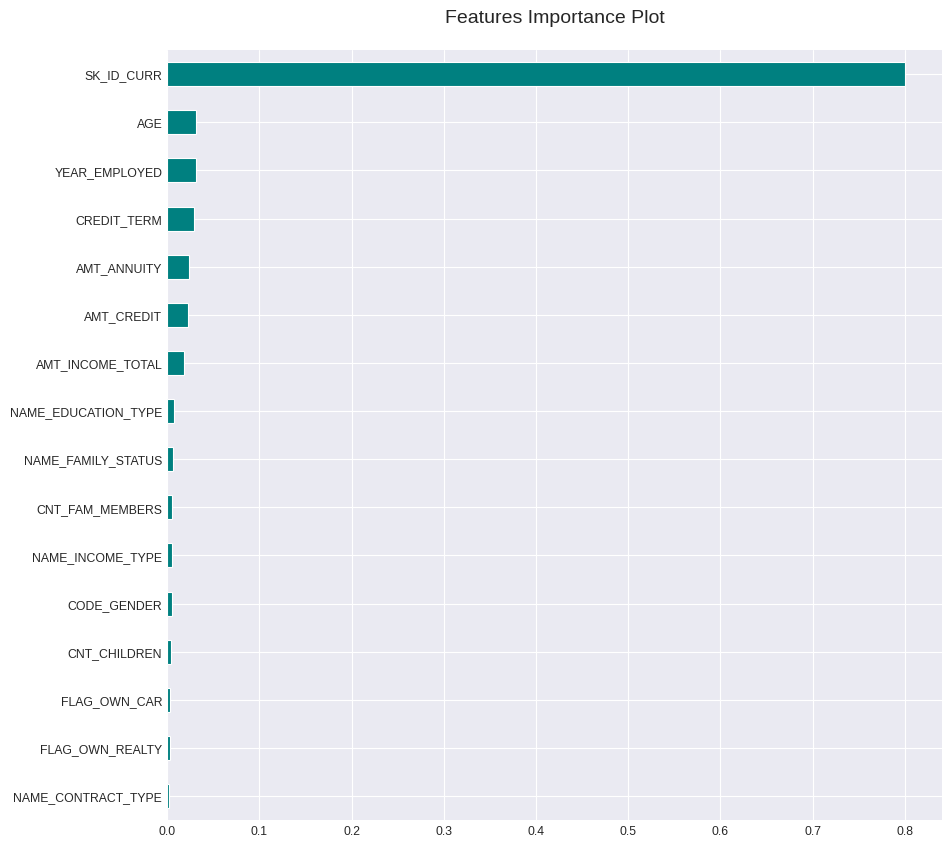

In [142]:
# important features
importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color ='teal')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top feature.png')

In [143]:
ref_cols = list(X.columns)

In [144]:
# import joblib
# joblib.dump(value = [rf_model, ref_cols, TARGET], filename="/content/drive/MyDrive/SKRIPSI/model.pkl")

In [145]:
#model save
import pickle
filename = 'model.sav'
pickle.dump(rf_model, open(filename, 'wb'))

In [146]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
import joblib
filename = 'model.sav'
joblib.dump(rf_model, filename)

['model.sav']

In [148]:
pred = pd.read_csv('/content/hsl.csv')

In [149]:
pred['Predicted'] = pred['Predicted'].replace(1, 'Default')
pred['Predicted'] = pred['Predicted'].replace(0, 'Non-default')

In [150]:
pred.to_csv('pred.csv', index=False)